# ---------------------------------------------------------------------------------------------------------------

# 1. Import Libraries

In [1]:
import pandas as pd
from dython.nominal import associations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import toad
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/Manually/1. raw_default_of_credit_card_clients.xls')
file.head()

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# ---------------------------------------------------------------------------------------------------------------
# 2. EDA - Exploratory Data Analysis 

### 2.1 summarizing data / descriptive statistics -----------------------------------------------------------------------------------------------

In [3]:
# manually drop those data w/o description and those unknown data

In [4]:
# Raw file (no. of rows, no. of columns)
file.shape

(26893, 25)

In [5]:
# print column names of dataset
file.columns

Index(['ID', 'AMOUNT_OF_GIVEN_CREDIT', 'SEX', 'EDUCATION', 'MARITAL_STATUS',
       'AGE', 'REPAYMENT_STATUS_IN_SEPTEMBER', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [6]:
# find the count, mean, standard deviation....
# know all the attritions
file.describe()

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,...,26893.000000,26893.000000,26893.000000,26893.000000,2.689300e+04,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000
mean,14821.985572,159093.581229,1.594876,1.833154,1.560592,35.312089,0.394415,0.049046,0.003049,-0.063213,...,46490.189008,43288.065891,41753.867624,5566.773547,5.657438e+03,5101.945488,4692.604135,4658.448555,5031.837095,0.232105
std,8635.518569,127198.611394,0.490925,0.705326,0.518601,9.256918,0.790098,1.104099,1.117348,1.099277,...,65709.999931,62172.798571,60916.463009,16056.347407,2.034086e+04,17420.001522,15260.059059,14682.315334,17211.480945,0.422183
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7362.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,...,4041.000000,3040.000000,2173.000000,1100.000000,1.000000e+03,504.000000,370.000000,349.000000,268.000000,0.000000
50%,14709.000000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,21289.000000,19715.000000,19227.000000,2200.000000,2.058000e+03,1901.000000,1529.000000,1600.000000,1500.000000,0.000000
75%,22197.000000,230000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,0.000000,0.000000,0.000000,...,59696.000000,55063.000000,52624.000000,5005.000000,5.000000e+03,4500.000000,4011.000000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


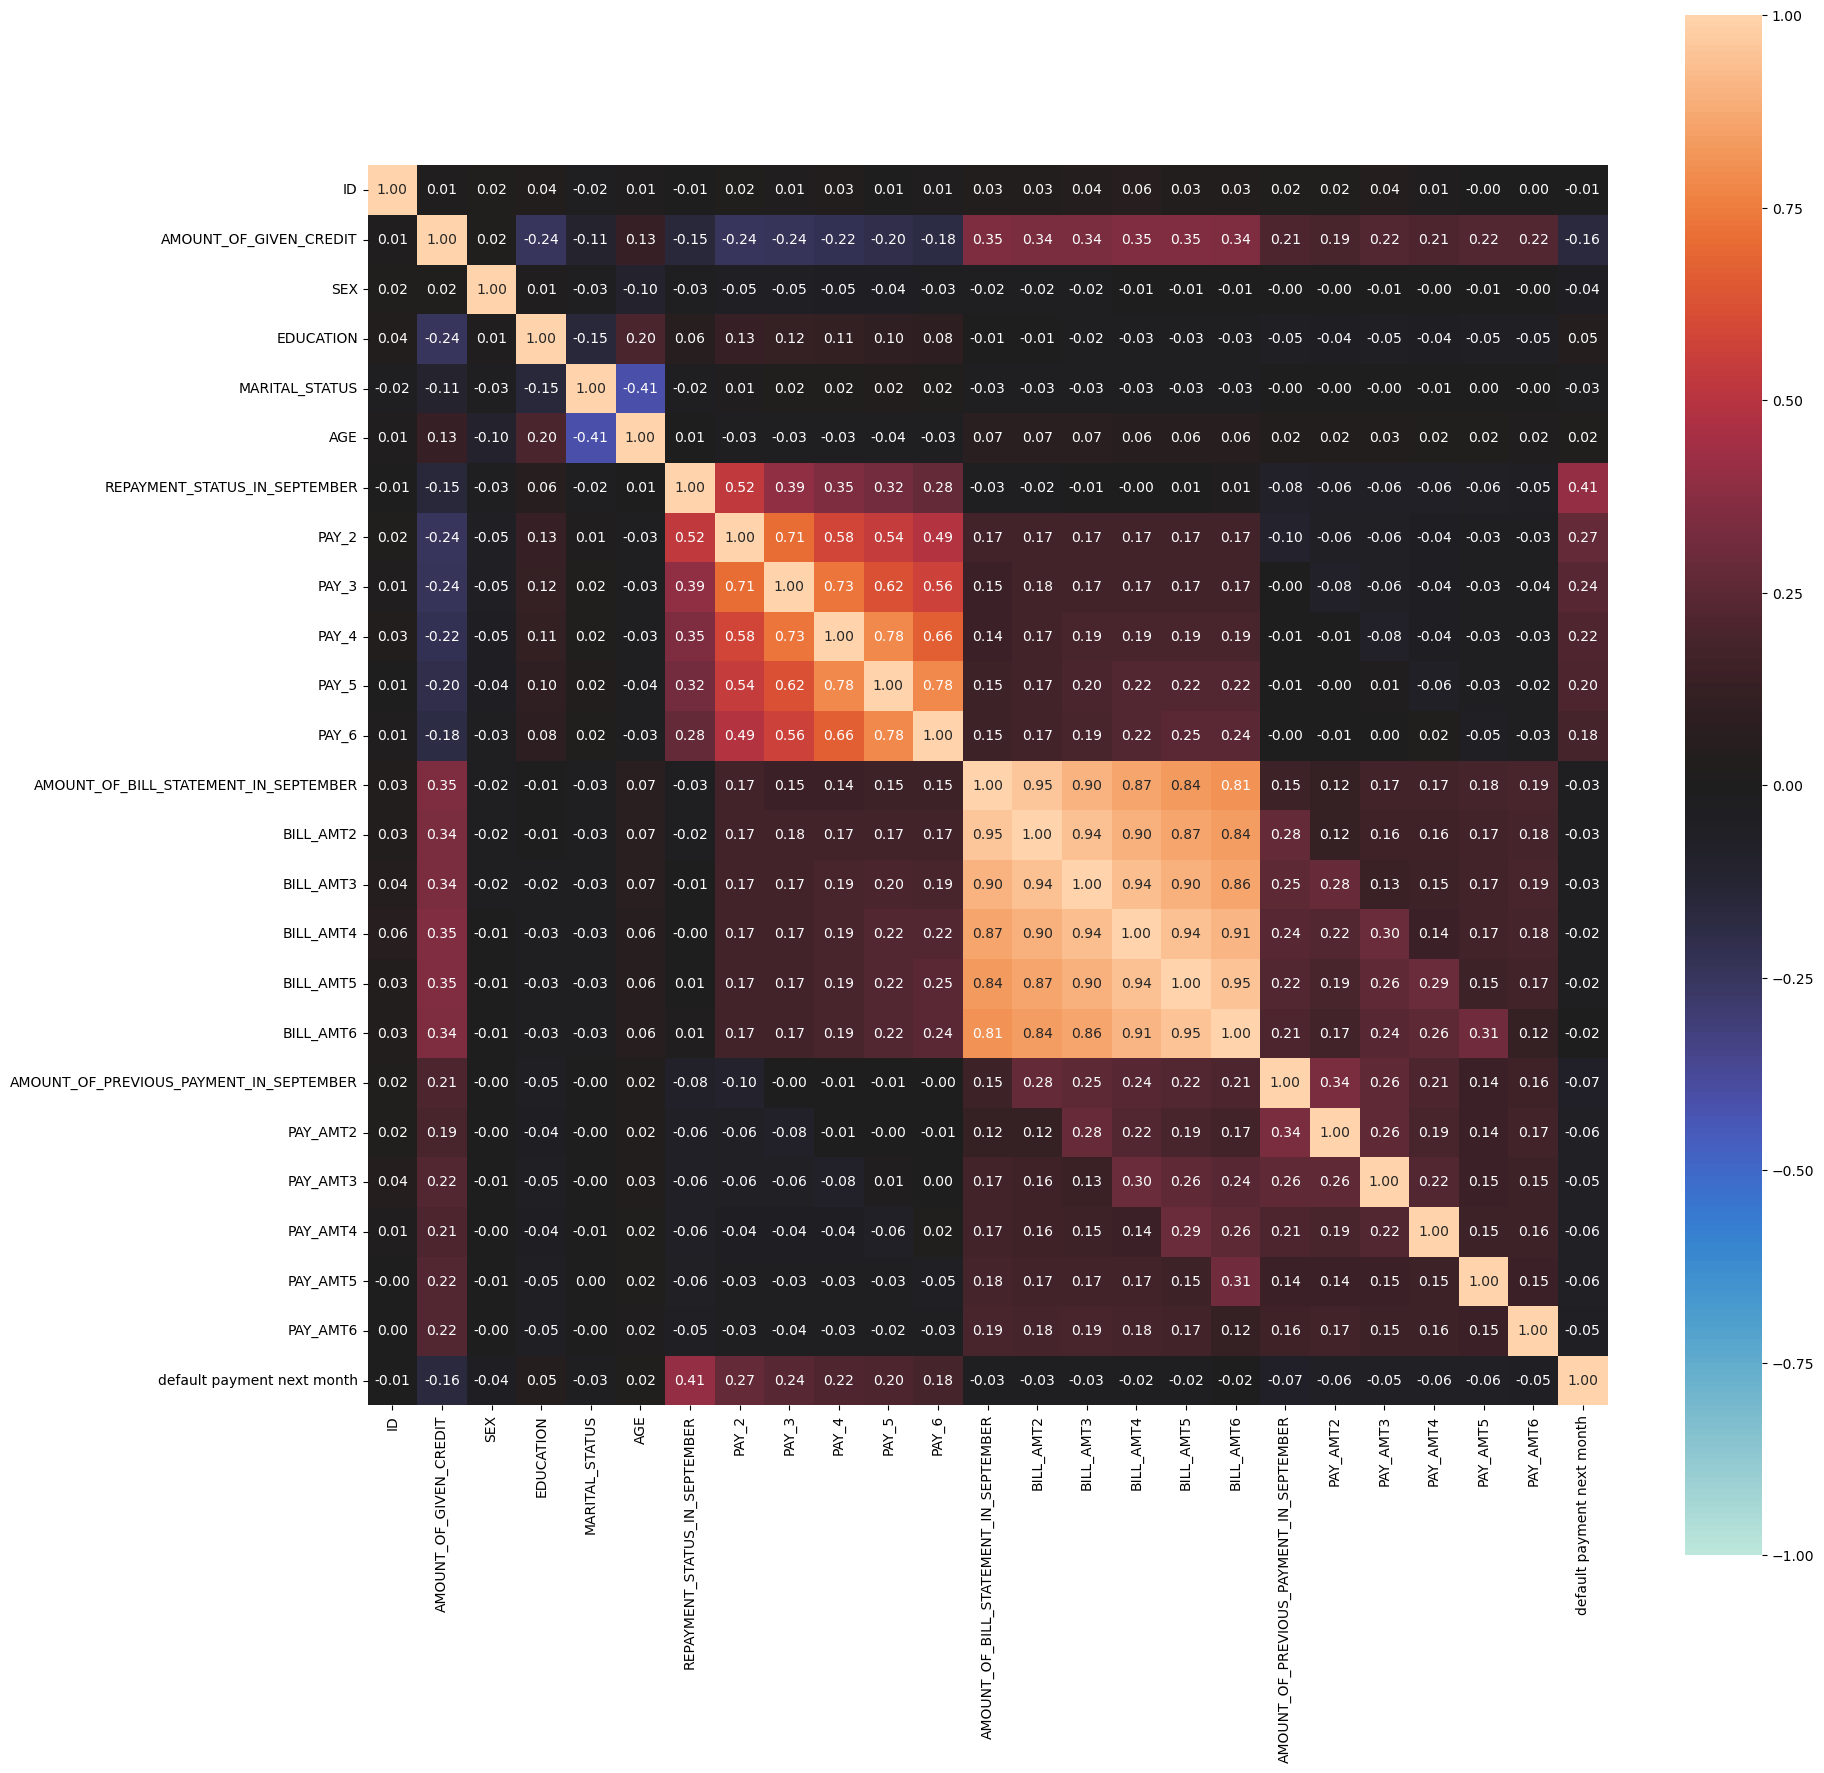

In [7]:
categorical_correlation1 = associations(file, filename= 'categorical_correlation1.png', figsize=(20,20))

In [8]:
# drop no predictive function's column
noFunctionColumn = ['PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
file_want_column = file.drop(noFunctionColumn, axis=1)
file_want_column.shape

(26893, 10)

In [9]:
# save into excel
# remainning column = column wanted 
# file_want_column.to_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/2. file_want_column.xlsx', index=False)

In [10]:
file_want_column.describe()
# the description for the remainning attributes are still the same since only drop those not related column 

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
count,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000,26893.000000
mean,14821.985572,159093.581229,1.594876,1.833154,1.560592,35.312089,0.394415,55216.446585,5566.773547,0.232105
std,8635.518569,127198.611394,0.490925,0.705326,0.518601,9.256918,0.790098,75160.182133,16056.347407,0.422183
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,-165580.000000,0.000000,0.000000
25%,7362.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,5780.000000,1100.000000,0.000000
50%,14709.000000,130000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,27254.000000,2200.000000,0.000000
75%,22197.000000,230000.000000,2.000000,2.000000,2.000000,41.000000,1.000000,72991.000000,5005.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,964511.000000,873552.000000,1.000000


In [11]:
#to know the data type in file
file_want_column.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26893 entries, 0 to 26892
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   ID                                       26893 non-null  int64
 1   AMOUNT_OF_GIVEN_CREDIT                   26893 non-null  int64
 2   SEX                                      26893 non-null  int64
 3   EDUCATION                                26893 non-null  int64
 4   MARITAL_STATUS                           26893 non-null  int64
 5   AGE                                      26893 non-null  int64
 6   REPAYMENT_STATUS_IN_SEPTEMBER            26893 non-null  int64
 7   AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER    26893 non-null  int64
 8   AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER  26893 non-null  int64
 9   default payment next month               26893 non-null  int64
dtypes: int64(10)
memory usage: 2.1 MB


### 2.2 number of zeros ---------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Count number of zeros in all columns of Dataframe

for column_name in file_want_column.columns:
    column = file_want_column[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, 'is: ', count)

Count of zeros in column ID is:  0
Count of zeros in column AMOUNT_OF_GIVEN_CREDIT is:  0
Count of zeros in column SEX is:  0
Count of zeros in column EDUCATION is:  0
Count of zeros in column MARITAL_STATUS is:  0
Count of zeros in column AGE is:  0
Count of zeros in column REPAYMENT_STATUS_IN_SEPTEMBER is:  20132
Count of zeros in column AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER is:  1301
Count of zeros in column AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER is:  4300
Count of zeros in column default payment next month is:  20651


- REPAYMENT_STATUS_IN_SEPTEMBER is classifier, 
  0 represent there it is pay duly and above, we cannot remove it 
- AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER  is numerical value, we will do   further analysis on it
- AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER is numerical value, we will do   further analysis on it
- DEFAULT_PAYMENT_NEXT_MONTH is the output that we want to find, cannot be removed

### 2.3 missing values / no of null -------------------------------------------------------------------------------------------------------------------

In [13]:
file_want_column.isnull().sum()

ID                                         0
AMOUNT_OF_GIVEN_CREDIT                     0
SEX                                        0
EDUCATION                                  0
MARITAL_STATUS                             0
AGE                                        0
REPAYMENT_STATUS_IN_SEPTEMBER              0
AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER      0
AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER    0
default payment next month                 0
dtype: int64

- There is no missing data.
- Hence, we do not need to deal with missing data.

### 2.4 correlation statistics ---------------------------------------------------------------------------------------------------------------------------

In [14]:
# can also using scatter plot for all the variable to observe 
# in R code 

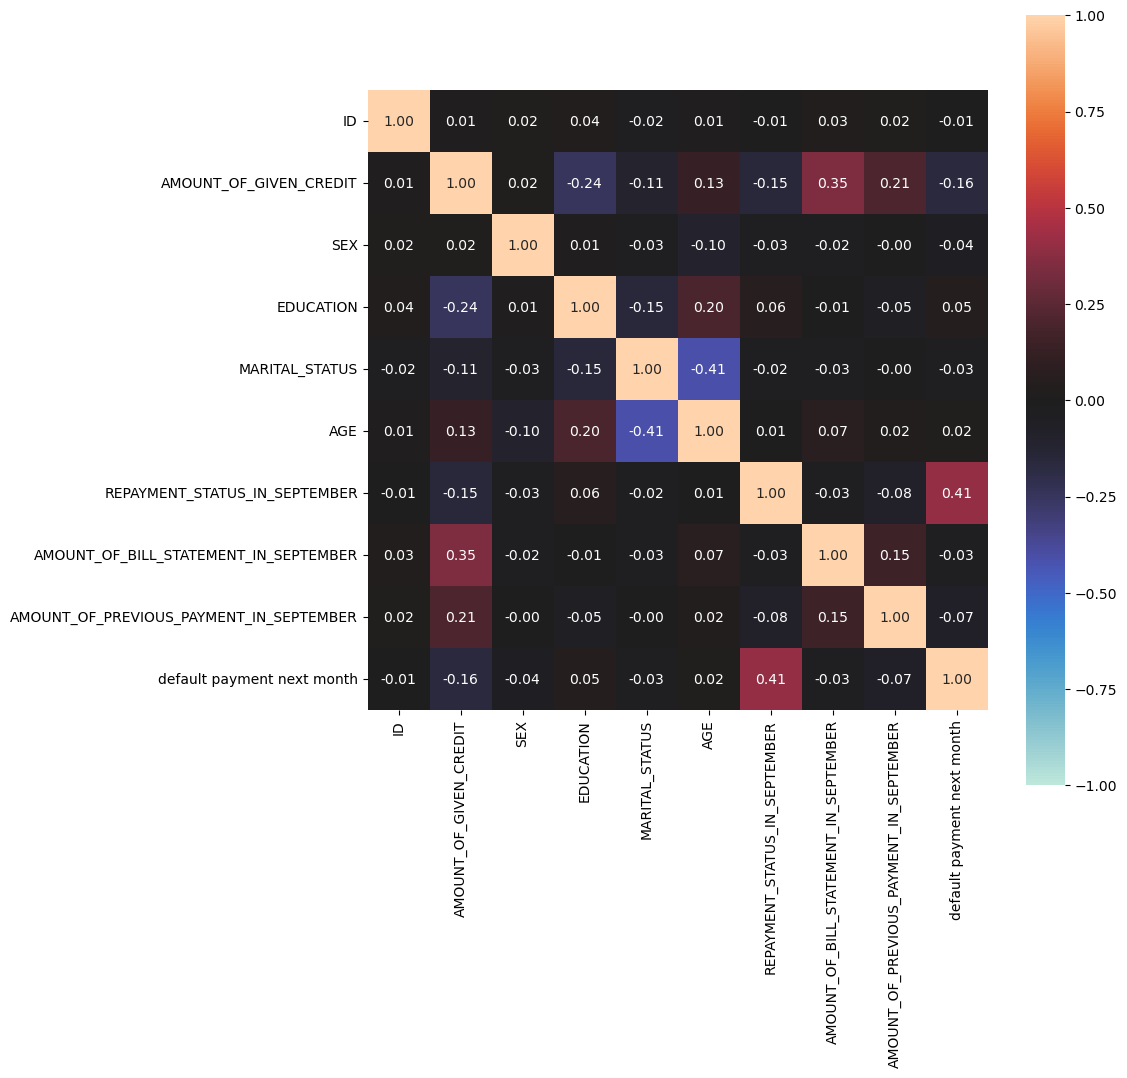

In [15]:
categorical_correlation= associations(file_want_column, filename= 'categorical_correlation.png', figsize=(10,10))

- There is no strong correlation relationship through a firm linear rule, according to Ratner (2009).
- Hence, we do not need to remove any columns.

### 2.5 Target Variable's Distribution ---------------------------------------------------------------------------------------------------------------

In [16]:
# no of count for target variable
file_want_column['default payment next month'].value_counts()

0    20651
1     6242
Name: default payment next month, dtype: int64

In [17]:
# probability of default for target variable
file_want_column['default payment next month'].value_counts(normalize=True)

0    0.767895
1    0.232105
Name: default payment next month, dtype: float64

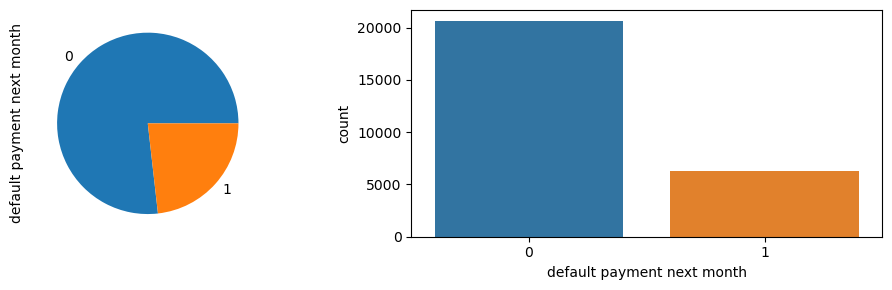

In [18]:
# visualization of Target variable
fig= plt.figure(figsize=(10,3) )

fig.add_subplot(1,2,1)
pieChart = file_want_column['default payment next month'].value_counts(normalize=True).plot.pie()

fig.add_subplot(1,2,2)
barChart = sns.countplot(x=file_want_column['default payment next month'])

plt.tight_layout()
plt.show()

### 2.6 visualization for categorical data  ---------------------------------------------------------------------------------------------------------

#### 2.6.1 sex 

In [19]:
# cross tab for sex column
crossTabSex = pd.crosstab(file_want_column['SEX'], file_want_column['default payment next month'], margins=True)
crossTabSex

default payment next month,0,1,All
SEX,,,
1,8145,2750,10895
2,12506,3492,15998
All,20651,6242,26893


In [20]:
# find the default rate of sex
crossTabSex['Default Rate'] = ((crossTabSex.iloc[:,1]) / (crossTabSex.iloc[:,-1])) *100
crossTabSex

default payment next month,0,1,All,Default Rate
SEX,,,,
1,8145,2750,10895,25.240936
2,12506,3492,15998,21.827728
All,20651,6242,26893,23.210501


- from the cross tab above, we can conclude that there is no  big difference between male and female for default rate 

<AxesSubplot:xlabel='SEX'>

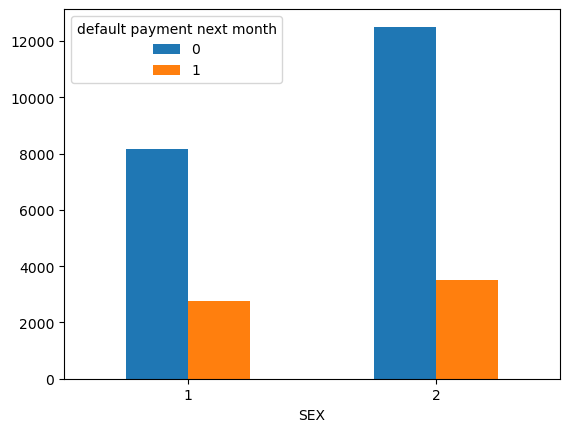

In [21]:
# side-by-side bar chart for sex
crossTabSex = pd.crosstab(file_want_column['SEX'], file_want_column['default payment next month'])
barSex= crossTabSex.plot.bar(rot=0)
barSex

#### 2.6.2 education 

In [22]:
# cross tab for education column
crossTabEducation = pd.crosstab(file_want_column['EDUCATION'], file_want_column['default payment next month'], margins=True)
crossTabEducation

default payment next month,0,1,All
EDUCATION,,,
1,7357,1856,9213
2,9844,3204,13048
3,3360,1178,4538
4,90,4,94
All,20651,6242,26893


In [23]:
# find the default rate of education
crossTabEducation['Default Rate'] = ((crossTabEducation.iloc[:,1]) / (crossTabEducation.iloc[:,-1])) *100
crossTabEducation

default payment next month,0,1,All,Default Rate
EDUCATION,,,,
1,7357,1856,9213,20.145447
2,9844,3204,13048,24.555487
3,3360,1178,4538,25.958572
4,90,4,94,4.255319
All,20651,6242,26893,23.210501


- since we know that 1=graduate school, 2=university, 3=high school, 4=others
- from the cross tab above, we can conclude that a higher education level, will cause a higher default rate.

<AxesSubplot:xlabel='EDUCATION'>

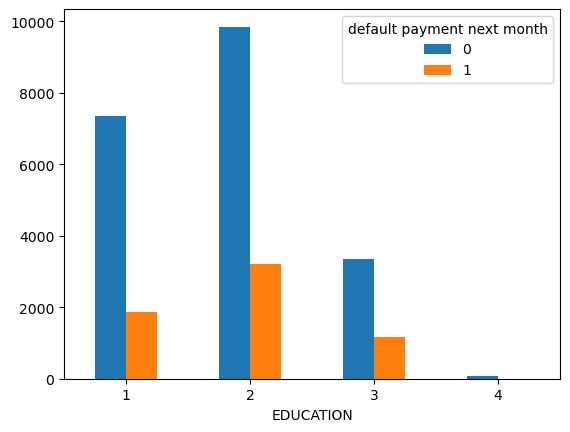

In [24]:
# side-by-side bar chart for education
crossTabEducation = pd.crosstab(file_want_column['EDUCATION'], file_want_column['default payment next month'])
barEducation= crossTabEducation.plot.bar(rot=0)
barEducation

#### 2.6.3 marital_status 

In [25]:
# cross tab for marital status column
crossTabMaritalStatus = pd.crosstab(file_want_column['MARITAL_STATUS'], file_want_column['default payment next month'], margins=True)
crossTabMaritalStatus

default payment next month,0,1,All
MARITAL_STATUS,,,
1,9118,3003,12121
2,11311,3157,14468
3,222,82,304
All,20651,6242,26893


In [26]:
# find the default rate of marital status 
crossTabMaritalStatus['Default Rate'] = ((crossTabMaritalStatus.iloc[:,1]) / (crossTabMaritalStatus.iloc[:,-1])) *100
crossTabMaritalStatus

default payment next month,0,1,All,Default Rate
MARITAL_STATUS,,,,
1,9118,3003,12121,24.775184
2,11311,3157,14468,21.820570
3,222,82,304,26.973684
All,20651,6242,26893,23.210501


- since we know that 1=married, 2=single, 3=others
- from the cross tab above, we can conclude that those others will give a highest default rate

<AxesSubplot:xlabel='MARITAL_STATUS'>

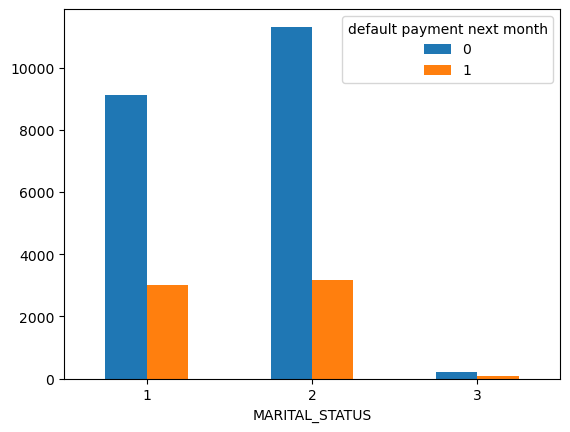

In [27]:
# side-by-side bar chart for marital status
crossTabMaritalStatus = pd.crosstab(file_want_column['MARITAL_STATUS'], file_want_column['default payment next month'])
barMaritalStatus= crossTabMaritalStatus.plot.bar(rot=0)
barMaritalStatus

#### 2.6.4 repayment_status_in_september

In [28]:
# cross tab for repayment_status_in_september column
crossTabRepayment = pd.crosstab(file_want_column['REPAYMENT_STATUS_IN_SEPTEMBER'], file_want_column['default payment next month'], margins=True)
crossTabRepayment

default payment next month,0,1,All
REPAYMENT_STATUS_IN_SEPTEMBER,,,
0,17311,2821,20132
1,2411,1251,3662
2,803,1837,2640
3,76,244,320
4,24,52,76
5,11,13,24
6,5,6,11
7,2,7,9
8,8,11,19


In [29]:
# find the default rate of repayment_status_in_september
crossTabRepayment['Default Rate'] = ((crossTabRepayment.iloc[:,1]) / (crossTabRepayment.iloc[:,-1])) *100
crossTabRepayment

default payment next month,0,1,All,Default Rate
REPAYMENT_STATUS_IN_SEPTEMBER,,,,
0,17311,2821,20132,14.012517
1,2411,1251,3662,34.161660
2,803,1837,2640,69.583333
3,76,244,320,76.250000
4,24,52,76,68.421053
5,11,13,24,54.166667
6,5,6,11,54.545455
7,2,7,9,77.777778
8,8,11,19,57.894737


- we know that 0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months
- from the cross tab above, we know that pay duly will have the lowest default rate and payment delay for eight months has the highest default rate 

<AxesSubplot:xlabel='REPAYMENT_STATUS_IN_SEPTEMBER'>

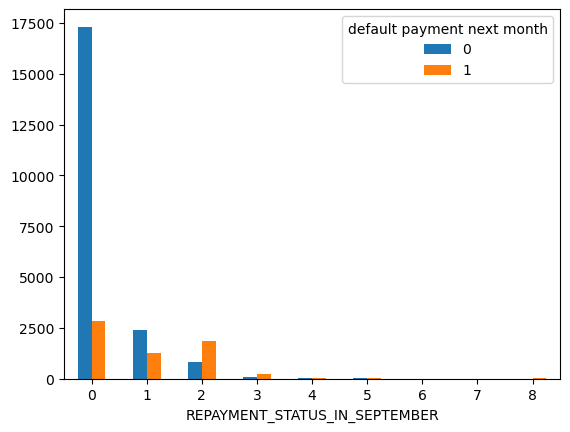

In [30]:
# side-by-side bar chart for repayment_status_in_september
crossTabRepayment = pd.crosstab(file_want_column['REPAYMENT_STATUS_IN_SEPTEMBER'], file_want_column['default payment next month'])
barRepayment= crossTabRepayment.plot.bar(rot=0)
barRepayment

### 2.7 visualization for numerical data (bar chart) --------------------------------------------------------------------------------------------

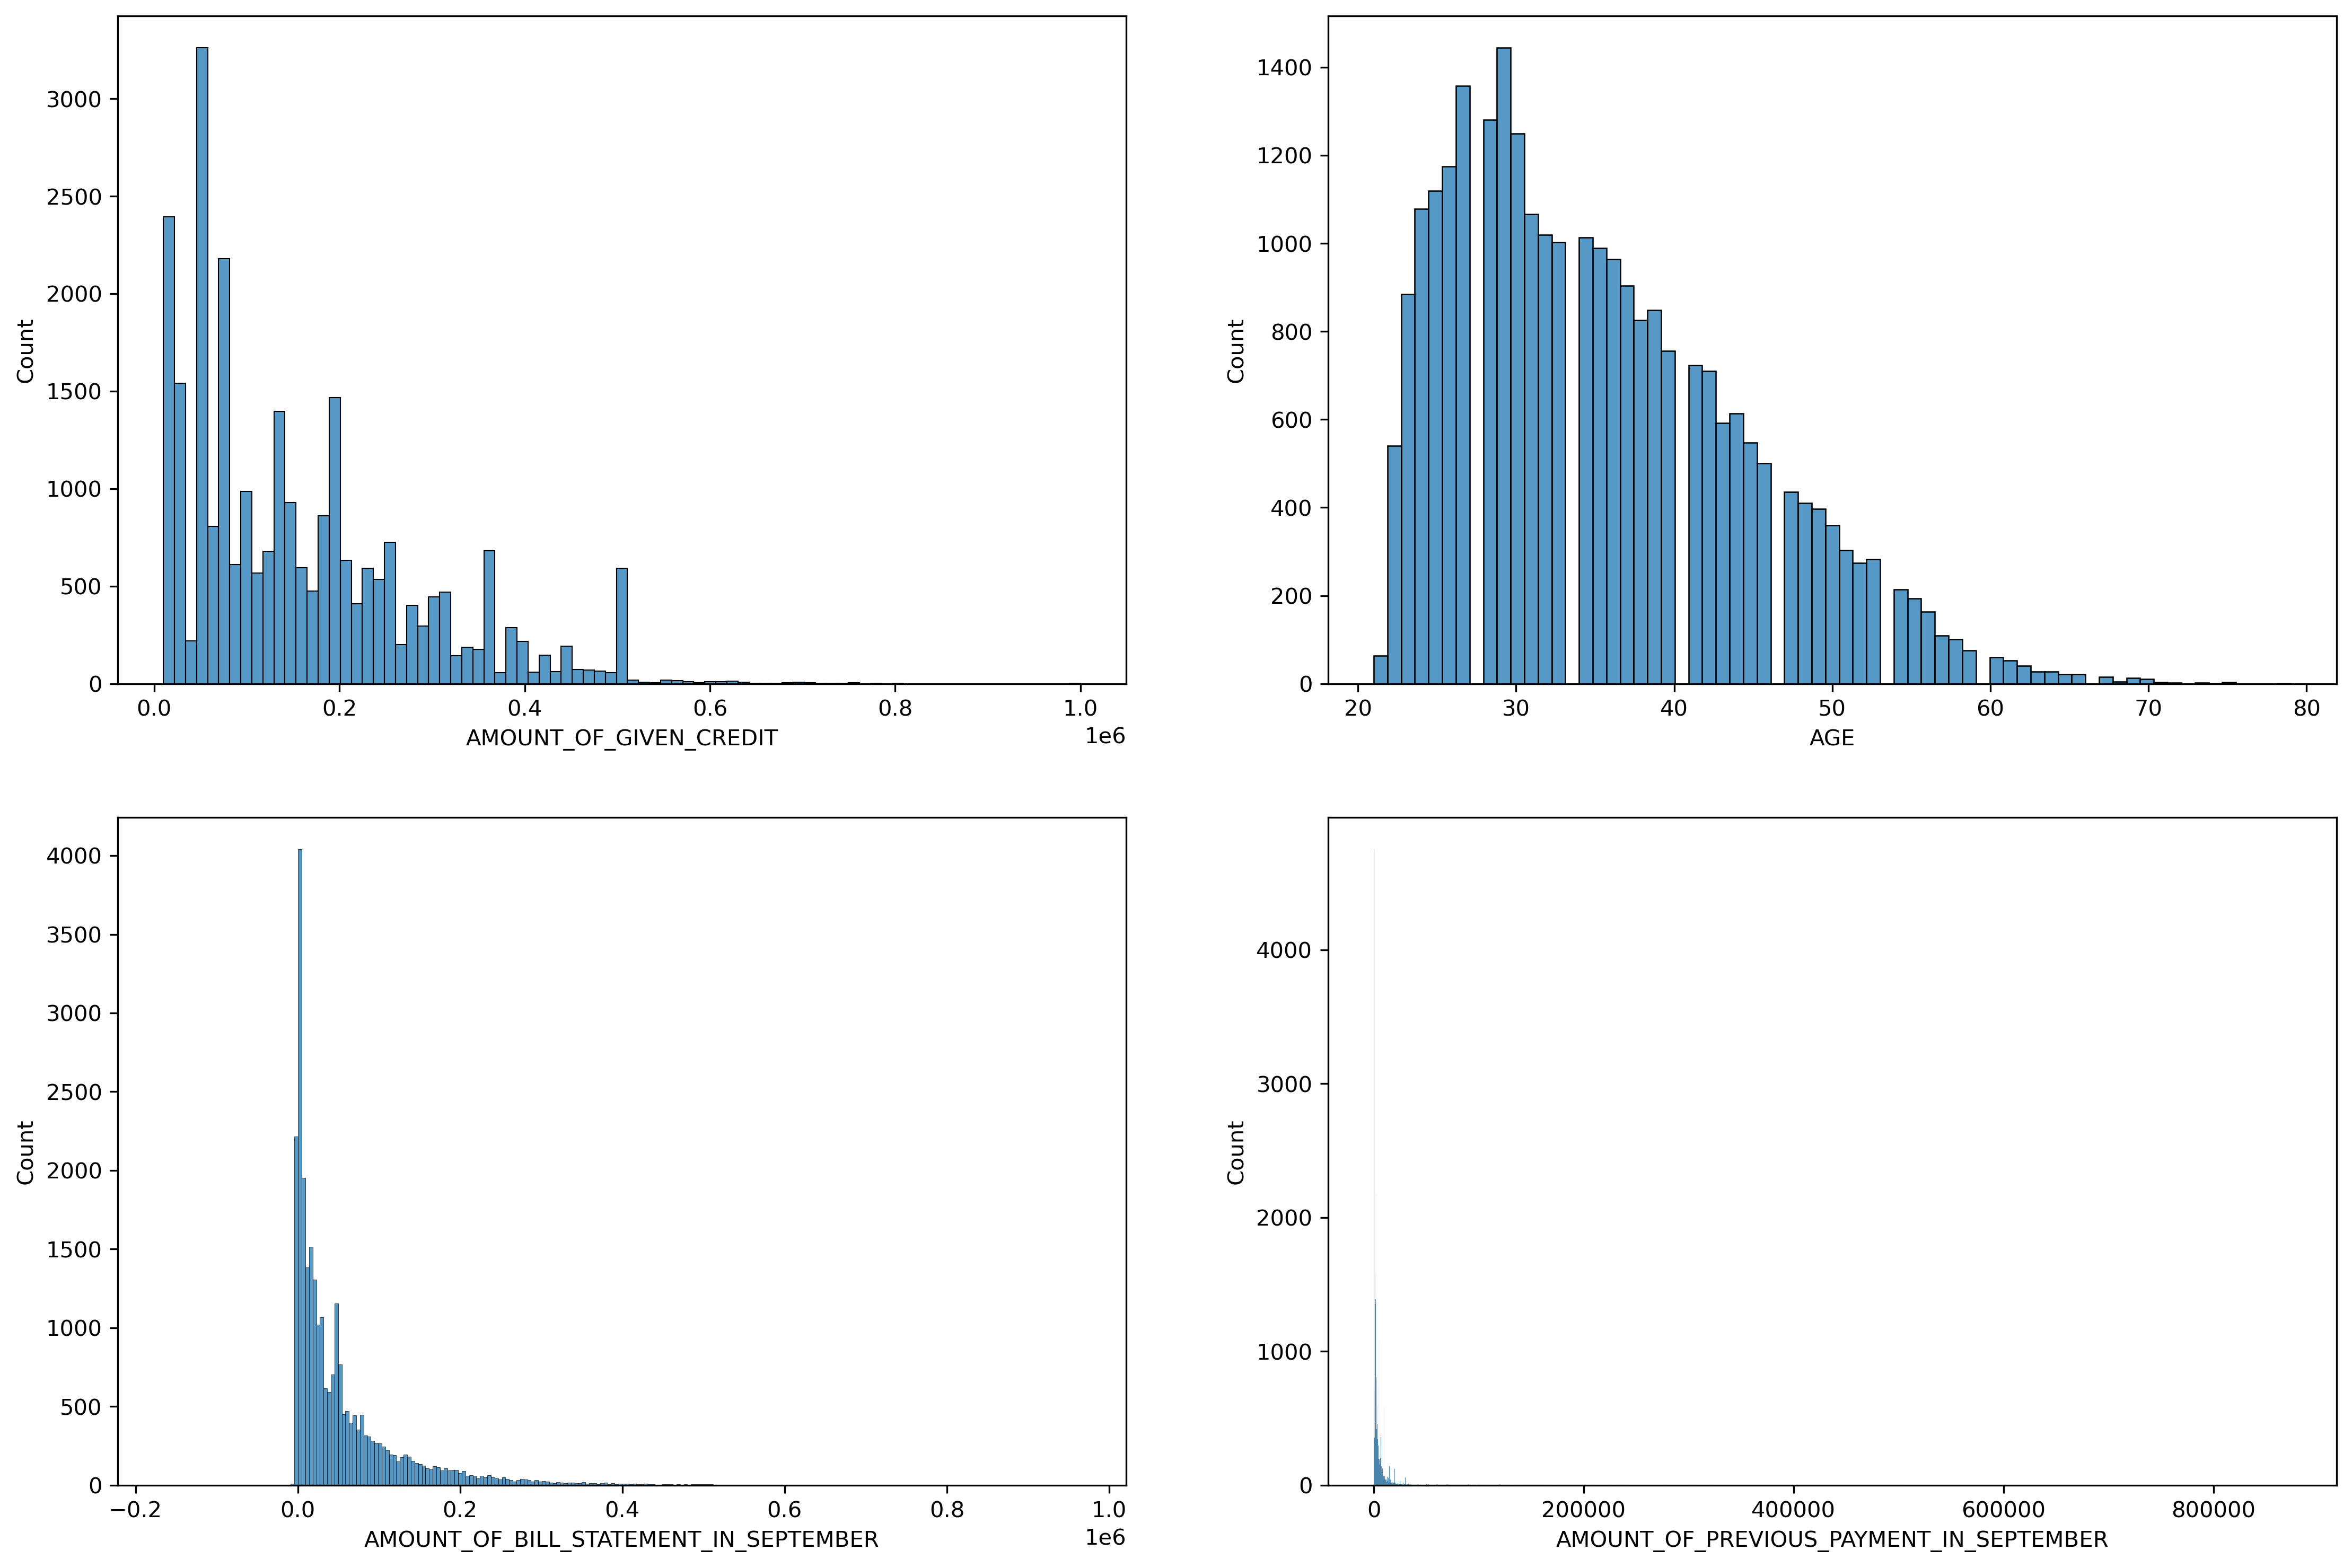

In [31]:
# numeric data = amount of given credit, age, amount of bill statement in september, amount of previous payment in september  
numeric_data = [ 'AMOUNT_OF_GIVEN_CREDIT', 'AGE', 'AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER', 'AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(numeric_data):
    plt.subplot(2, 2, i[0]+1)
    sns.histplot(x = i[1], data = file_want_column)
plt.show()

### 2.8 visualization for numerical data (box plot) ---------------------------------------------------------------------------------------------

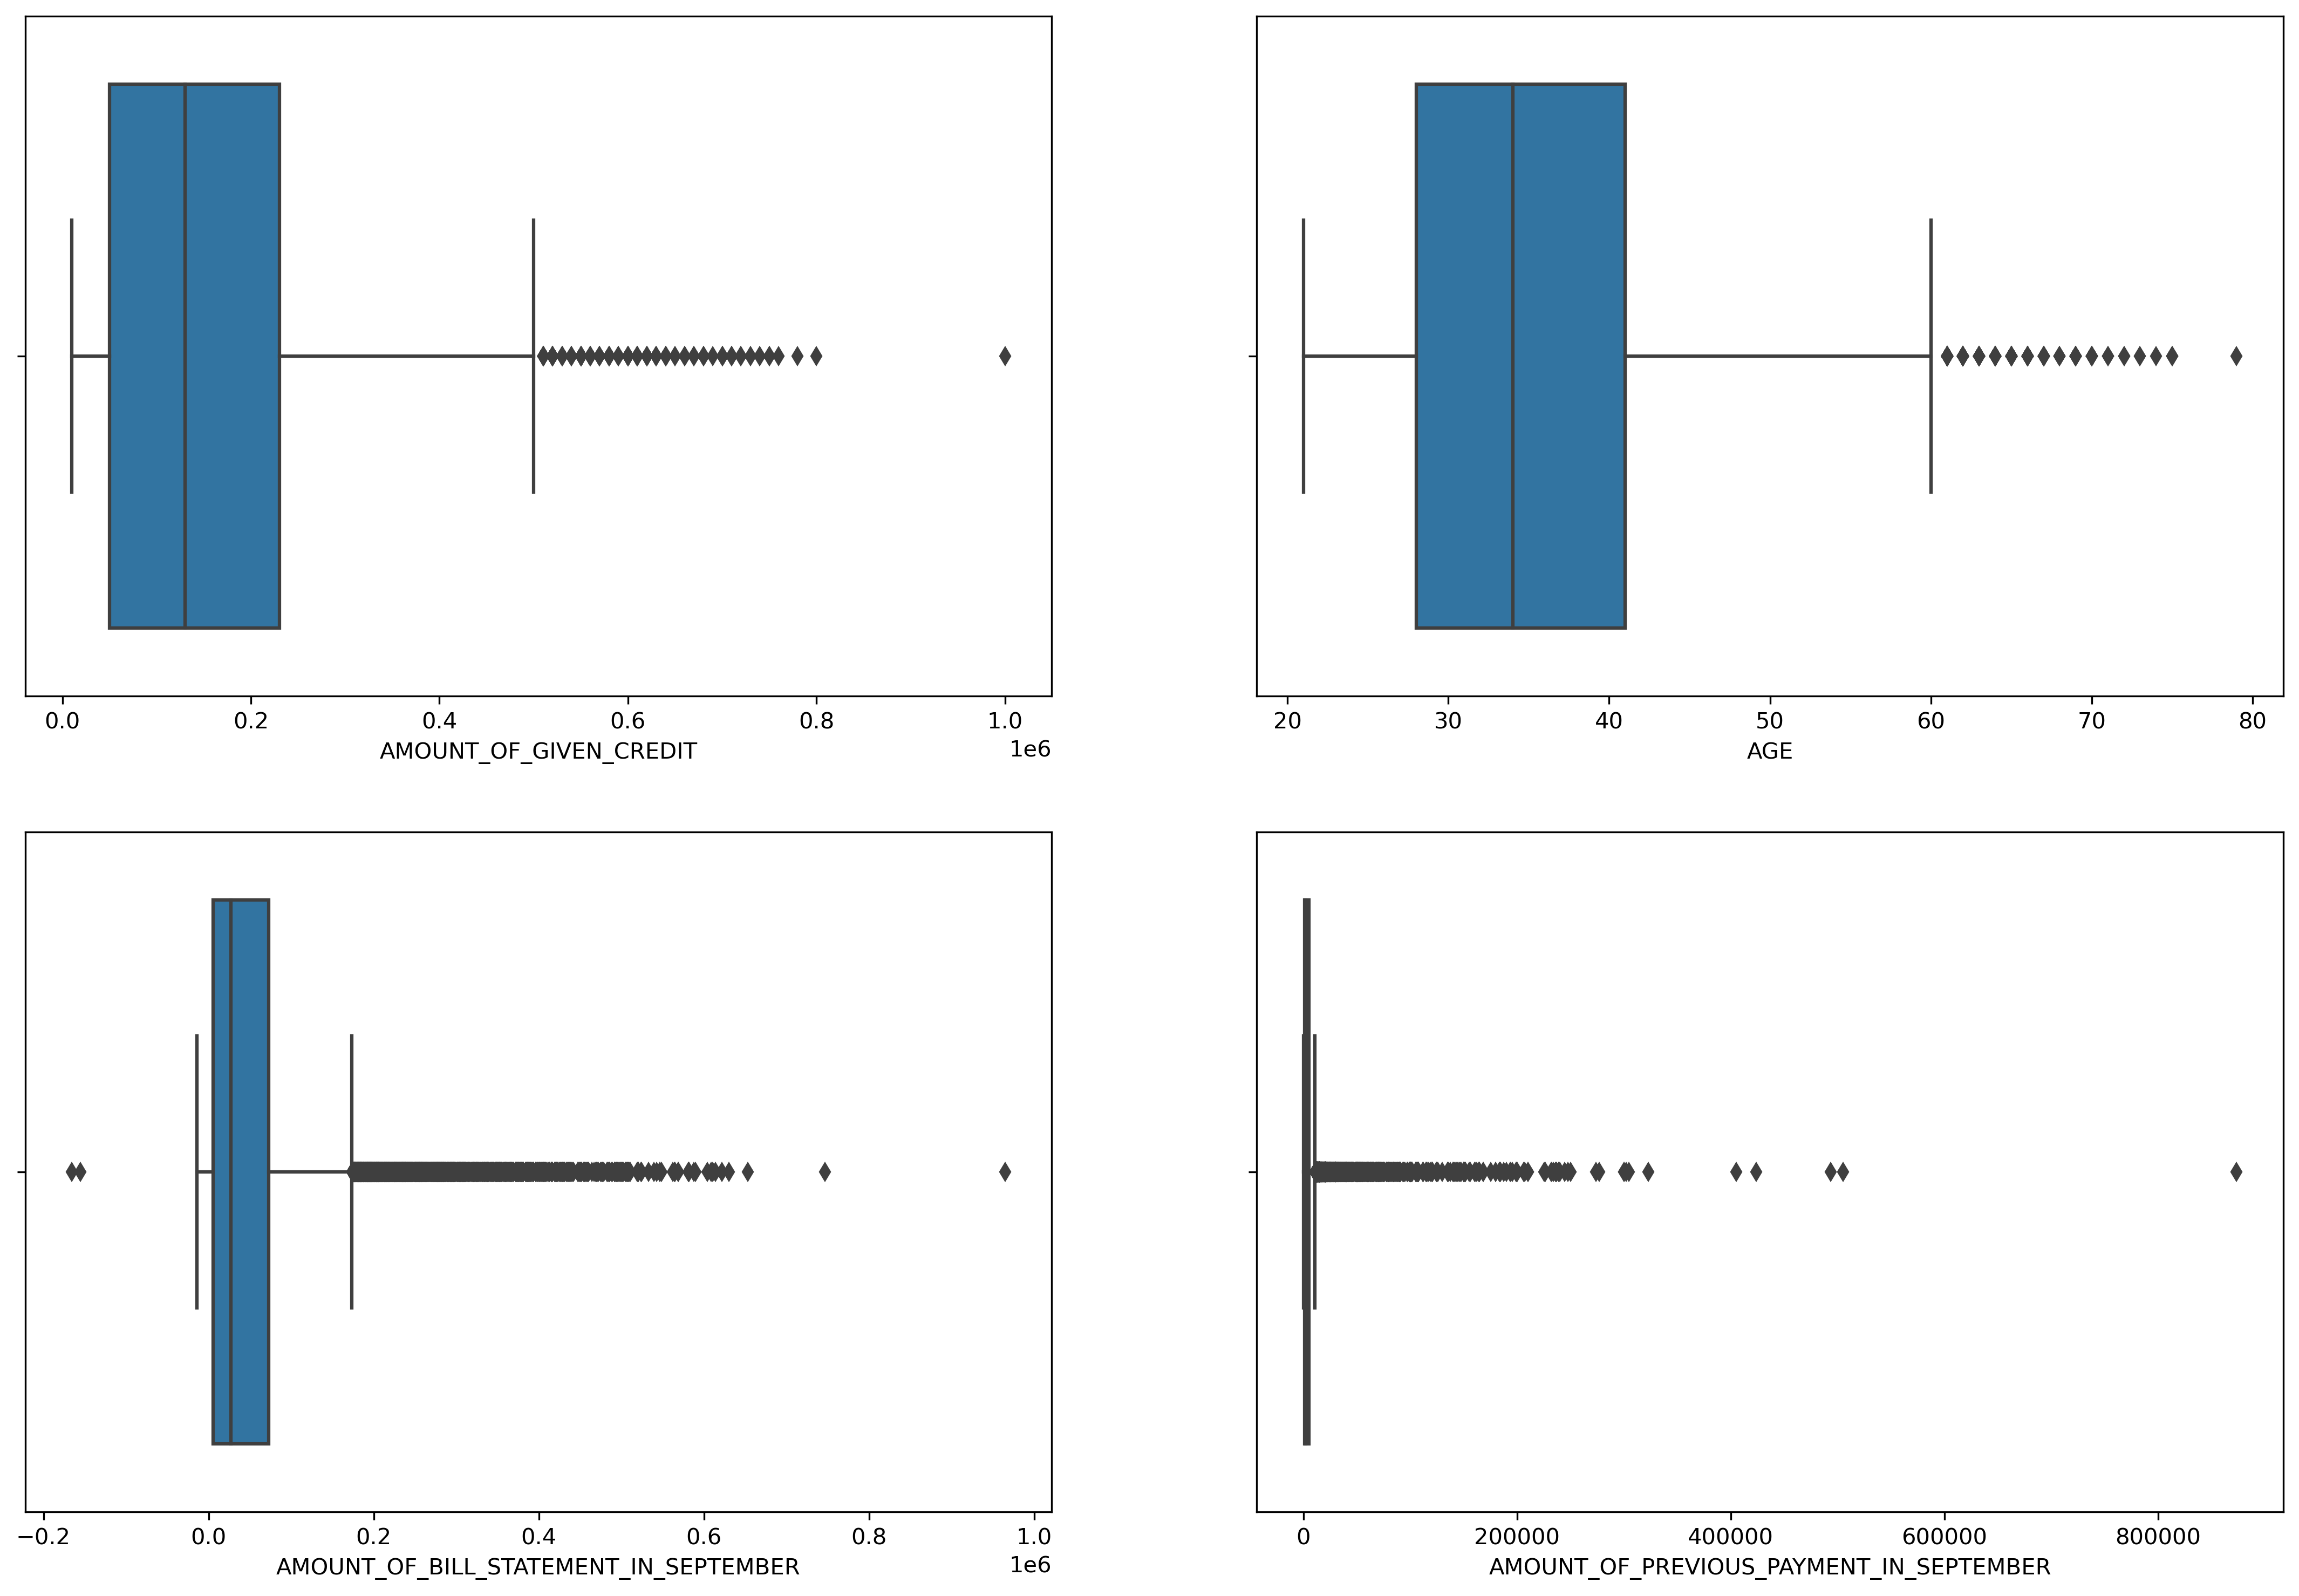

In [32]:
# numeric data = amount of given credit, age, amount of bill statement in september, amount of previous payment in september  
numeric_data = [ 'AMOUNT_OF_GIVEN_CREDIT', 'AGE', 'AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER', 'AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(numeric_data):
    plt.subplot(2, 2, i[0]+1)
    sns.boxplot(x = i[1], data = file_want_column)
plt.show()

from the box plot above, from my opinion and using Industry Training's knowledge 
1. amount of given credit: outlier can be accepted since there is no limit to the number of credit cards you can own unless you earn less than RM36,000 per annum

2. age: must be 21 years old or older, since our age column all is older than 21 years old, we assume that there is no outlier for age attibute


### 2.9 finding and handling outlier -----------------------------------------------------------------------------------------------------------------

In [33]:
# define a function to find outliers using IQR
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower_limit = q1-1.5*IQR 
    upper_limit = q3+1.5*IQR 
    print('q1: ' + str(q1))
    print('q3: ' + str(q3))
    print('lower limit: ' + str(lower_limit))
    print('upper limit: ' + str(upper_limit) + '\n')
    outliers = data[((data<(lower_limit)) | (data>(upper_limit)))]
    return outliers

##### 2.9.1 AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER's outlier 

In [34]:
file_want_column = file_want_column.copy()

In [35]:
# finding AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER's outlier 
amountOfBillStatementOutlier = find_outliers_IQR(file_want_column['AMOUNT_OF_GIVEN_CREDIT'])
print("number of outliers: "+ str(len(amountOfBillStatementOutlier)))
print("max outlier value: "+ str(amountOfBillStatementOutlier.max()))
print("min outlier value: "+ str(amountOfBillStatementOutlier.min()))
amountOfBillStatementOutlier

q1: 50000.0
q3: 230000.0
lower limit: -220000.0
upper limit: 500000.0

number of outliers: 169
max outlier value: 1000000
min outlier value: 510000


11       630000
239      510000
399      580000
417      600000
489      620000
          ...  
26141    510000
26356    610000
26511    570000
26790    630000
26860    610000
Name: AMOUNT_OF_GIVEN_CREDIT, Length: 169, dtype: int64

- we can choose to remove or replace the outlier 

###### 2.9.1.1 remove AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER's outlier 

In [36]:
file_remove_AmountBillStatement = file_want_column.copy()

In [37]:
file_Remove_AmountBillStatement = file_remove_AmountBillStatement[~((file_remove_AmountBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']<(-220000.0)) | (file_remove_AmountBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']>(500000.0)))]
file_Remove_AmountBillStatement

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,1,20000,2,2,1,24,2,3913,0,1
1,2,120000,2,2,2,26,0,2682,0,1
2,3,90000,2,2,2,34,0,29239,1518,0
3,4,50000,2,2,1,37,0,46990,2000,0
4,5,50000,1,2,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...
26888,29996,220000,1,3,1,39,0,188948,8500,0
26889,29997,150000,1,3,2,43,0,1683,1837,0
26890,29998,30000,1,2,2,37,4,3565,0,1
26891,29999,80000,1,3,1,41,1,-1645,85900,1


###### 2.9.1.2 replace AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER's outlier

In [38]:
file_replace_AmountOfBillStatement = file_want_column.copy()

In [39]:
# find mean of AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER
meanAmountBillStatement = round(file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'].mean())
meanAmountBillStatement

55216

In [40]:
percentile5_AmountBillStatement = round(np.percentile(file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'], 5))
print('percentile_0.05 = ', percentile5_AmountBillStatement)
percentile95_AmountBillStatement = round(np.percentile(file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'], 95))
print('percentile_0.95 = ' , percentile95_AmountBillStatement)

percentile_0.05 =  0
percentile_0.95 =  207071


In [41]:
# replace outlier with 5th and 95th percentile 
file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'] = np.where(file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'] < -5500.0, percentile5_AmountBillStatement, file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'])
file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'] = np.where(file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'] > 22500.0, percentile95_AmountBillStatement, file_replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER'])

file_Replace_AmountOfBillStatement = file_replace_AmountOfBillStatement
file_Replace_AmountOfBillStatement

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,1,20000,2,2,1,24,2,3913,0,1
1,2,120000,2,2,2,26,0,2682,0,1
2,3,90000,2,2,2,34,0,207071,1518,0
3,4,50000,2,2,1,37,0,207071,2000,0
4,5,50000,1,2,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...
26888,29996,220000,1,3,1,39,0,207071,8500,0
26889,29997,150000,1,3,2,43,0,1683,1837,0
26890,29998,30000,1,2,2,37,4,3565,0,1
26891,29999,80000,1,3,1,41,1,-1645,85900,1


###### 2.9.1.3 compare AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER's outlier in visualization

In [42]:
file_want_column = file_want_column.copy()

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

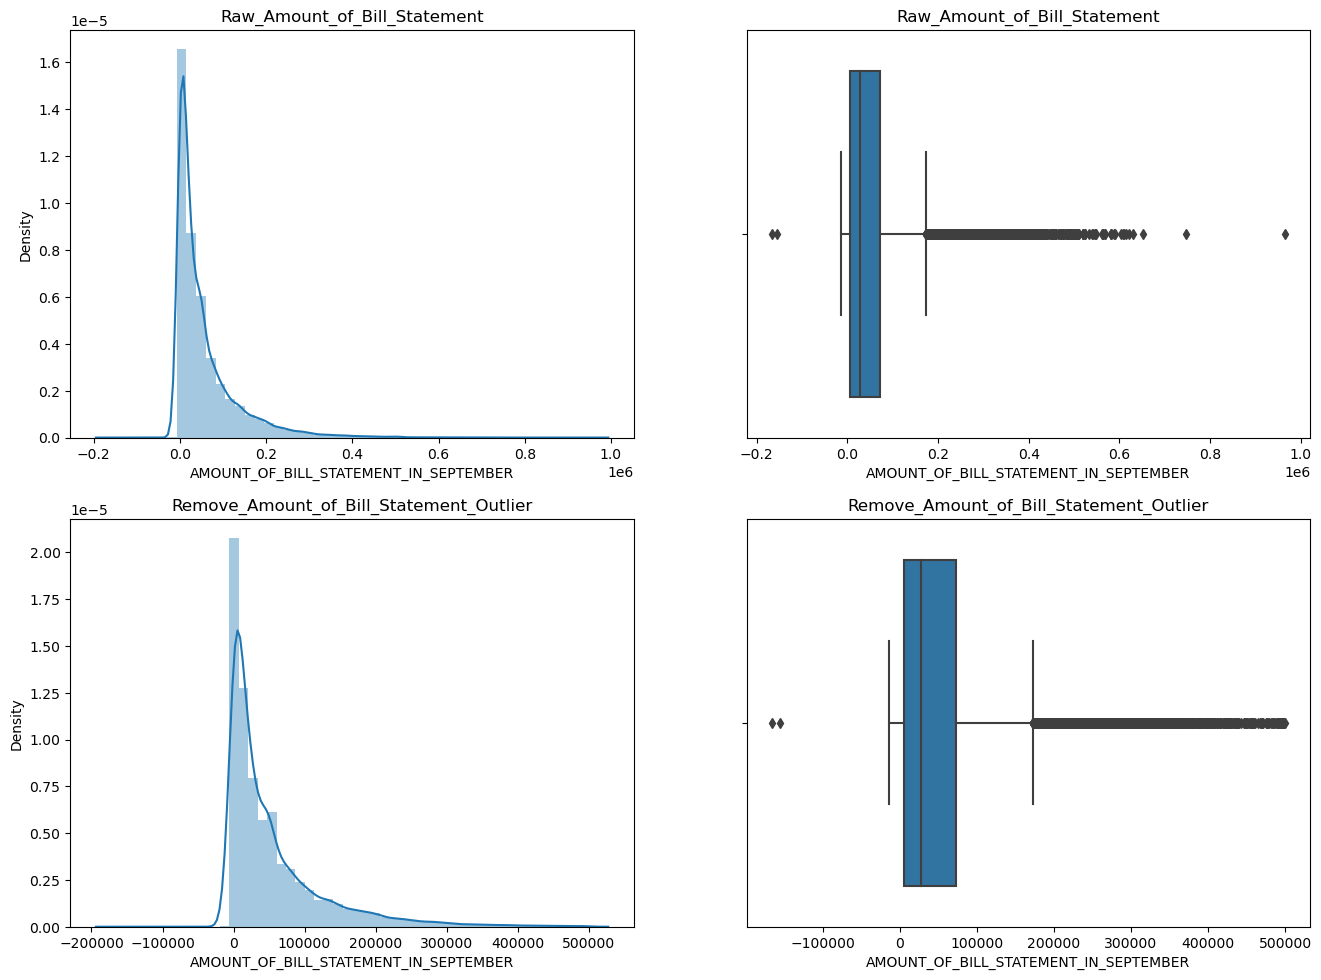

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


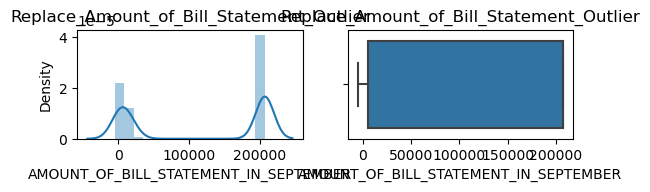

In [43]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.distplot(file_want_column['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']).set_title('Raw_Amount_of_Bill_Statement')
plt.subplot(3,2,2)
sns.boxplot(file_want_column['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']).set_title('Raw_Amount_of_Bill_Statement')

plt.subplot(3,2,3)
sns.distplot(file_Remove_AmountBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']).set_title('Remove_Amount_of_Bill_Statement_Outlier')
plt.subplot(3,2,4)
sns.boxplot(file_Remove_AmountBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']).set_title('Remove_Amount_of_Bill_Statement_Outlier')
plt.show()

plt.subplot(3,2,5)
sns.distplot(file_Replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']).set_title('Replace_Amount_of_Bill_Statement_Outlier')
plt.subplot(3,2,6)
sns.boxplot(file_Replace_AmountOfBillStatement['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']).set_title('Replace_Amount_of_Bill_Statement_Outlier')
plt.show()

- From visualization above, we can conclude that Remove Amount of Bill Statement's outlier is more logically than Replace Amount of Bill Statement's outlier

In [44]:
# check the shape of AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER
AmountBillStatement_Before_After = pd.DataFrame([['Raw_AmountBillStatement', file_want_column.shape]],
                   columns = ['Column', 'Shape'])

Remove_AmountBillStatement = pd.DataFrame([['Remove_AmountBillStatement', file_Remove_AmountBillStatement.shape]],
                   columns = ['Column', 'Shape'])

AmountBillStatement_Before_After = AmountBillStatement_Before_After.append(Remove_AmountBillStatement, ignore_index = True)

Replace_AmountBillStatement = pd.DataFrame([['Replace_AmountBillStatement', file_Replace_AmountOfBillStatement.shape]],
                   columns = ['Column', 'Shape'])

AmountBillStatement_Before_After = AmountBillStatement_Before_After.append(Replace_AmountBillStatement, ignore_index = True)
AmountBillStatement_Before_After

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\155557184.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AmountBillStatement_Before_After = AmountBillStatement_Before_After.append(Remove_AmountBillStatement, ignore_index = True)
C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\155557184.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AmountBillStatement_Before_After = AmountBillStatement_Before_After.append(Replace_AmountBillStatement, ignore_index = True)


,Column,Shape
0,Raw_AmountBillStatement,"(26893, 10)"
1,Remove_AmountBillStatement,"(26849, 10)"
2,Replace_AmountBillStatement,"(26893, 10)"


In [45]:
# we conclude that remove Amount of Bill Statement look more logically
# save remove Amount Bill Statement into excel 
# file_Remove_AmountBillStatement.to_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/RemoveBillStatement.xlsx')

##### 2.9.2 AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER's outlier

In [46]:
file_Remove_AmountBillStatement = file_Remove_AmountBillStatement.copy()

In [47]:
# finding AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER's outlier 
amountOfPreviousPaymentOutlier = find_outliers_IQR(file_Remove_AmountBillStatement['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'])
print("number of outliers: "+ str(len(amountOfPreviousPaymentOutlier)))
print("max outlier value: "+ str(amountOfPreviousPaymentOutlier.max()))
print("min outlier value: "+ str(amountOfPreviousPaymentOutlier.min()))
amountOfPreviousPaymentOutlier

q1: 1100.0
q3: 5003.0
lower limit: -4754.5
upper limit: 10857.5

number of outliers: 2412
max outlier value: 873552
min outlier value: 10882


6         55000
10        21818
28        17270
42        21540
51        17000
          ...  
26846     39032
26860    323014
26866     52951
26881     65000
26891     85900
Name: AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER, Length: 2412, dtype: int64

###### 2.9.2.1 remove AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER's outlier

In [48]:
file_remove_AmountPreviousPayment = file_Remove_AmountBillStatement.copy()

In [49]:
file_Remove_AmountPreviousPayment = file_remove_AmountPreviousPayment[~((file_remove_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']<(-4754.5)) | (file_remove_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']>(10857.5)))]
file_Remove_AmountPreviousPayment

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,1,20000,2,2,1,24,2,3913,0,1
1,2,120000,2,2,2,26,0,2682,0,1
2,3,90000,2,2,2,34,0,29239,1518,0
3,4,50000,2,2,1,37,0,46990,2000,0
4,5,50000,1,2,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...
26887,29995,80000,1,2,2,34,2,72557,7000,1
26888,29996,220000,1,3,1,39,0,188948,8500,0
26889,29997,150000,1,3,2,43,0,1683,1837,0
26890,29998,30000,1,2,2,37,4,3565,0,1


###### 2.9.2.2 replace AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER's outlier 

In [50]:
file_replace_AmountPreviousPayment = file_Remove_AmountBillStatement.copy()

In [51]:
# find mean of AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER
meanAmountPreviousPayment = round(file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'].mean())
meanAmountPreviousPayment

5539

In [52]:
percentile5_AmountPreviousPayment = round(np.percentile(file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'], 5))
print('percentile_0.05 = ', percentile5_AmountPreviousPayment)
percentile95_AmountBillStatement = round(np.percentile(file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'], 95))
print('percentile_0.95 = ' , percentile95_AmountBillStatement)

percentile_0.05 =  0
percentile_0.95 =  17095


In [53]:
# replace outlier with 5th and 95th percentile 
file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'] = np.where(file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'] < -4754.5, percentile5_AmountPreviousPayment, file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'])
file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'] = np.where(file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'] > 10857.5, percentile95_AmountBillStatement, file_replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'])

file_Replace_AmountPreviousPayment = file_replace_AmountPreviousPayment
file_Replace_AmountPreviousPayment

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,1,20000,2,2,1,24,2,3913,0,1
1,2,120000,2,2,2,26,0,2682,0,1
2,3,90000,2,2,2,34,0,29239,1518,0
3,4,50000,2,2,1,37,0,46990,2000,0
4,5,50000,1,2,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...
26888,29996,220000,1,3,1,39,0,188948,8500,0
26889,29997,150000,1,3,2,43,0,1683,1837,0
26890,29998,30000,1,2,2,37,4,3565,0,1
26891,29999,80000,1,3,1,41,1,-1645,17095,1


###### 2.9.2.3 compare AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER'outlier in visualization

In [54]:
file_want_column = file_want_column.copy()

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

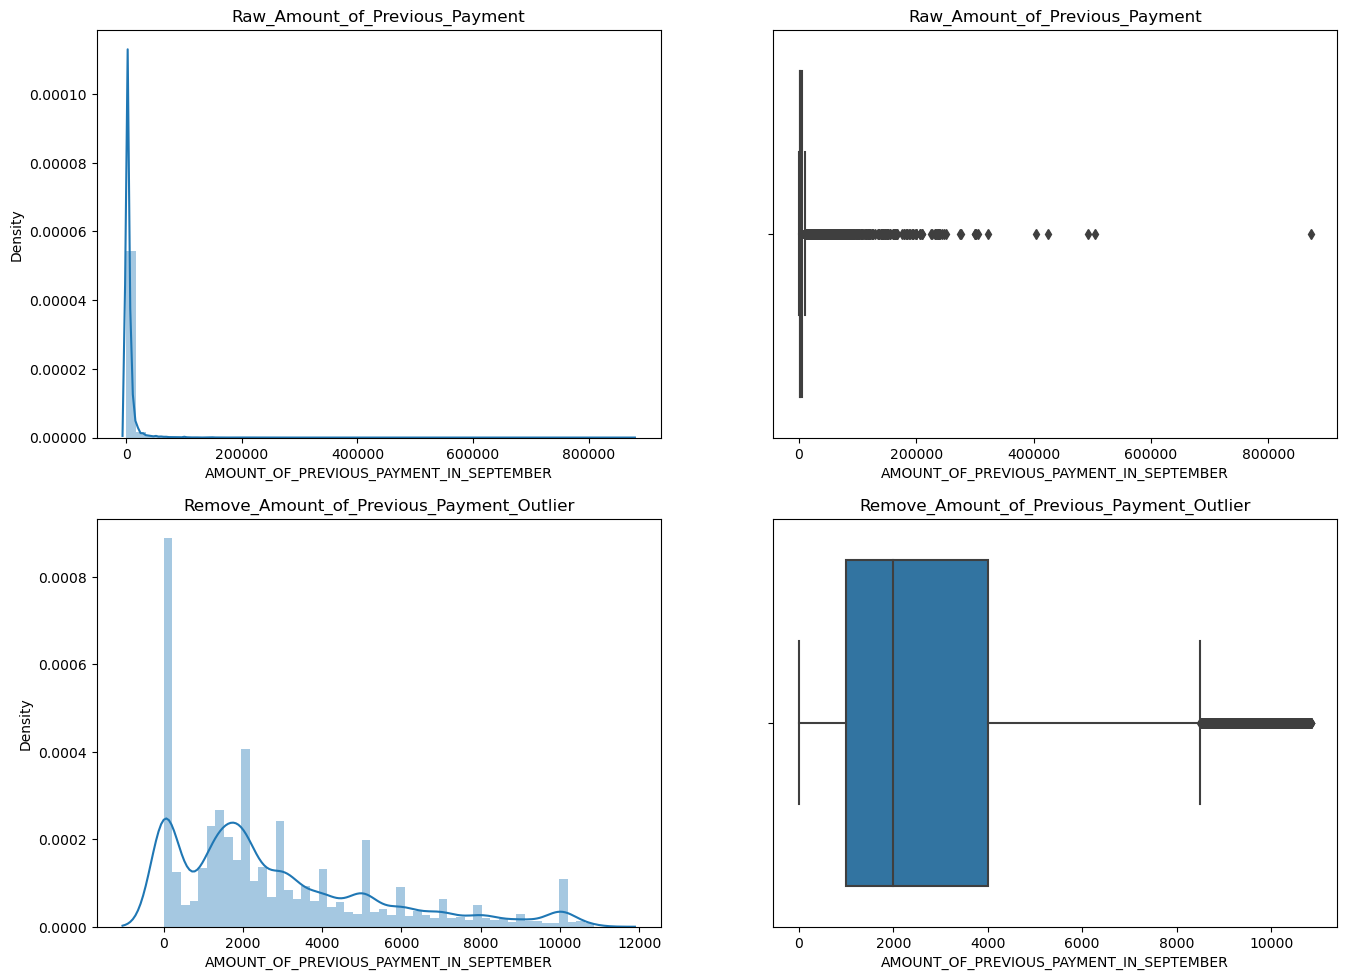

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


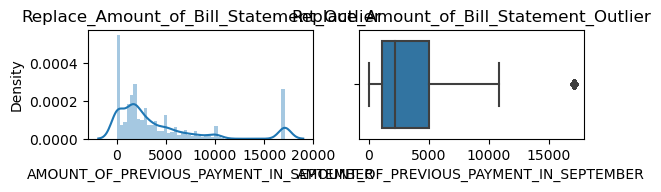

In [55]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.distplot(file_want_column['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']).set_title('Raw_Amount_of_Previous_Payment')
plt.subplot(3,2,2)
sns.boxplot(file_want_column['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']).set_title('Raw_Amount_of_Previous_Payment')

plt.subplot(3,2,3)
sns.distplot(file_Remove_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']).set_title('Remove_Amount_of_Previous_Payment_Outlier')
plt.subplot(3,2,4)
sns.boxplot(file_Remove_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']).set_title('Remove_Amount_of_Previous_Payment_Outlier')
plt.show()

plt.subplot(3,2,5)
sns.distplot(file_Replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']).set_title('Replace_Amount_of_Bill_Statement_Outlier')
plt.subplot(3,2,6)
sns.boxplot(file_Replace_AmountPreviousPayment['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']).set_title('Replace_Amount_of_Bill_Statement_Outlier')
plt.show()

- From visualization above, we can conclude that Remove Amount of Previous Payment's outlier is more logically than Replace Amount of Previous Payment's outlier

In [56]:
# check the shape of AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER
AmountPreviousPayment_Before_After = pd.DataFrame([['Raw_AmountPreviousPayment', file_want_column.shape]],
                   columns = ['Column', 'Shape'])

Remove_AmountPreviousPayment = pd.DataFrame([['Remove_AmountPreviousPayment', file_Remove_AmountPreviousPayment.shape]],
                   columns = ['Column', 'Shape'])

AmountPreviousPayment_Before_After = AmountPreviousPayment_Before_After.append(Remove_AmountPreviousPayment, ignore_index = True)

Replace_AmountPreviousPayment = pd.DataFrame([['Replace_AmountPreviousPayment', file_Replace_AmountPreviousPayment.shape]],
                   columns = ['Column', 'Shape'])

AmountPreviousPayment_Before_After = AmountPreviousPayment_Before_After.append(Replace_AmountPreviousPayment, ignore_index = True)
AmountPreviousPayment_Before_After

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\3131243566.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AmountPreviousPayment_Before_After = AmountPreviousPayment_Before_After.append(Remove_AmountPreviousPayment, ignore_index = True)
C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\3131243566.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AmountPreviousPayment_Before_After = AmountPreviousPayment_Before_After.append(Replace_AmountPreviousPayment, ignore_index = True)


,Column,Shape
0,Raw_AmountPreviousPayment,"(26893, 10)"
1,Remove_AmountPreviousPayment,"(24437, 10)"
2,Replace_AmountPreviousPayment,"(26849, 10)"


In [57]:
# we conclude that remove Amount of Bill Statement look more logically
# save remove Amount Bill Statement into excel 
#file_Remove_AmountPreviousPayment.to_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/RemovePreviousPayment.xlsx')

###### 2.9.3 check again the correlation

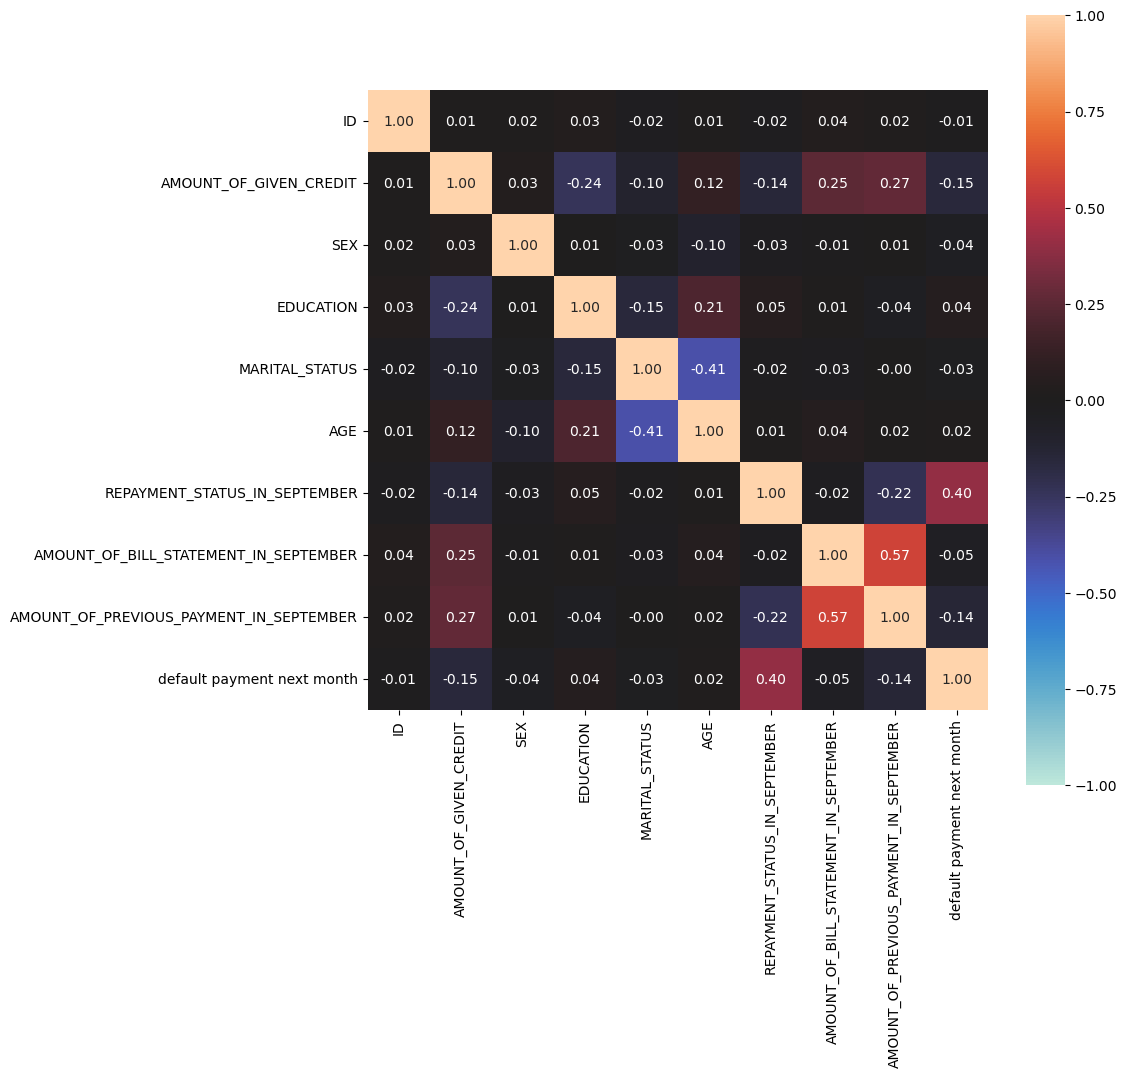

In [58]:
categorical_correlation= associations(file_Remove_AmountPreviousPayment, filename= 'categorical_correlation2.png', figsize=(10,10))

- There is no highly correlated data

##### 2.9.4 Final Clean File

In [59]:
file_FinalClean = file_Remove_AmountPreviousPayment.copy()
file_FinalClean

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,EDUCATION,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,1,20000,2,2,1,24,2,3913,0,1
1,2,120000,2,2,2,26,0,2682,0,1
2,3,90000,2,2,2,34,0,29239,1518,0
3,4,50000,2,2,1,37,0,46990,2000,0
4,5,50000,1,2,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...,...
26887,29995,80000,1,2,2,34,2,72557,7000,1
26888,29996,220000,1,3,1,39,0,188948,8500,0
26889,29997,150000,1,3,2,43,0,1683,1837,0
26890,29998,30000,1,2,2,37,4,3565,0,1


In [60]:
# save file_FinalClean into excel 
#file_FinalClean.to_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/3. file_final_clean.xlsx', index=False)

# ---------------------------------------------------------------------------------------------------------------

# 3. Feature Selection (IV)

- in real life project, may have to split train test data by date/time 
- Since our data do not include date and time, we can random split it 

Information Value (IV)
- measures the strength of that relationship based on WOE
- The industry level is to drop features with an IV lower than 0.02

In [61]:
# for those iv lower than 0.02 is recommed to drop from the dataset
# drop missing data > 70%
selected, drop_lst= toad.selection.select(frame = file_FinalClean,
                                                target=file_FinalClean['default payment next month'], 
                                                empty = 0.7, 
                                                iv = 0.02, corr = 1, 
                                                return_drop=True)
print("Recommend keep:",selected.shape[1],
      "\nRecommend drop empty:",len(drop_lst['empty']),
      "\nRecommend drop iv:",len(drop_lst['iv']),
      "\nRecommend drop corr:",len(drop_lst['corr']))

Recommend keep: 7 
Recommend drop empty: 0 
Recommend drop iv: 3 
Recommend drop corr: 0


In [62]:
# output the iv table to a dataframe
def output_iv_importance(file_FinalClean,label_col):
    feat_import_iv = toad.quality(file_FinalClean,label_col,iv_only=True)
    feat_import_iv=feat_import_iv['iv']
    feat_import_iv = feat_import_iv.reset_index()
    feat_import_iv.columns = ['Attributes_Name','IV_Value']
    return feat_import_iv

df_iv=output_iv_importance(file_FinalClean,'default payment next month')
df_iv

,Attributes_Name,IV_Value
0,REPAYMENT_STATUS_IN_SEPTEMBER,0.894160
1,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,0.181639
2,AMOUNT_OF_GIVEN_CREDIT,0.170389
3,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,0.035564
4,AGE,0.025855
5,ID,0.024945
6,EDUCATION,0.019325
7,SEX,0.009657
8,MARITAL_STATUS,0.008256


In [63]:
# obeserve the attribute from drop_lst to see the recommend drop column
drop_lst

{'empty': array([], dtype=float64),
 'iv': array(['SEX', 'EDUCATION', 'MARITAL_STATUS'], dtype=object),
 'corr': array([], dtype=object)}

- From Industry Training, I know that SEX and MARITAL_STATUS are two of the important feature obeserve.
- Hence, we will keep SEX and MARITAL_STATUS

- For EDUCATION, since the Information Value(IV) showing that it is not important enough, we can drop it from our data. 

In [64]:
# drop EDUCATION feature from the data
file_FinalClean_IV = file_FinalClean.drop('EDUCATION', axis=1)
file_FinalClean_IV

,ID,AMOUNT_OF_GIVEN_CREDIT,SEX,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,1,20000,2,1,24,2,3913,0,1
1,2,120000,2,2,26,0,2682,0,1
2,3,90000,2,2,34,0,29239,1518,0
3,4,50000,2,1,37,0,46990,2000,0
4,5,50000,1,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...,...
26887,29995,80000,1,2,34,2,72557,7000,1
26888,29996,220000,1,1,39,0,188948,8500,0
26889,29997,150000,1,2,43,0,1683,1837,0
26890,29998,30000,1,2,37,4,3565,0,1


In [65]:
#save into excel
#file_FinalClean_IV.to_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/4. file_FinalClean_IV.xlsx', index=False)

# ---------------------------------------------------------------------------------------------------------------
# 4. Feature Binning and Feature Tranforming (WoE and IV)

### 4.1 Remove ID -----------------------------------------------------------------------------------------------------------------------------------------

- Since ID will not prviding any predictive value but only to refer the data

In [66]:
# drop ID feature from the data
file_FinalClean_dropID = file_FinalClean_IV.drop('ID', axis=1)
file_FinalClean_dropID

,AMOUNT_OF_GIVEN_CREDIT,SEX,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,20000,2,1,24,2,3913,0,1
1,120000,2,2,26,0,2682,0,1
2,90000,2,2,34,0,29239,1518,0
3,50000,2,1,37,0,46990,2000,0
4,50000,1,1,57,0,8617,2000,0
...,...,...,...,...,...,...,...,...
26887,80000,1,2,34,2,72557,7000,1
26888,220000,1,1,39,0,188948,8500,0
26889,150000,1,2,43,0,1683,1837,0
26890,30000,1,2,37,4,3565,0,1


In [67]:
#save into excel
#file_FinalClean_dropID.to_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/5. file_FinalClean_dropID.xlsx', index=False)

### 4.2 Calculate Information Value and WOE ---------------------------------------------------------------------------------------------------

In [68]:
# Python Function to calculate Information Value and WOE
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

# In this user-defined function, there are 4 parameters user needs to mention.

# data means data frame in which dependent and independent variable(s) are stored.
# target refers to name of dependent variable.
# bins refers to number of bins or intervals. By default, it is 10.
# show_woe = True means you want to print the WOE calculation Table. By default, it is False



In [69]:
# How to run Function
# It returns two dataframes named iv and woe which contains Information value and WOE of all the variables.
# minimum bins = 3 
# maximum bins = 10 
iv, woe = iv_woe(data = file_FinalClean_dropID, target = 'default payment next month', bins=6, show_woe = True)

# Important Points related to Python Script 
# Dependent variable specified in target parameter must be binary. 
# 1 refers to event. 
# 0 refers to non-event.
# All numeric variables having no. of unique values less than or equal to 10 
# are considered as a categorical variable. 
# You can change the cutoff in the code len(np.unique(data[ivars]))>10



Information value of AMOUNT_OF_GIVEN_CREDIT is 0.16406
                 Variable                Cutoff     N  Events  % of Events  \
0  AMOUNT_OF_GIVEN_CREDIT   (9999.999, 40000.0]  4078    1518     0.256896   
1  AMOUNT_OF_GIVEN_CREDIT    (40000.0, 70000.0]  4639    1292     0.218650   
2  AMOUNT_OF_GIVEN_CREDIT   (70000.0, 120000.0]  4133    1055     0.178541   
3  AMOUNT_OF_GIVEN_CREDIT  (120000.0, 180000.0]  3944     799     0.135217   
4  AMOUNT_OF_GIVEN_CREDIT  (180000.0, 260000.0]  3895     722     0.122186   
5  AMOUNT_OF_GIVEN_CREDIT  (260000.0, 780000.0]  3748     523     0.088509   

   Non-Events  % of Non-Events       WoE        IV  
0        2560         0.138169  0.620193  0.073634  
1        3347         0.180646  0.190933  0.007256  
2        3078         0.166127  0.072067  0.000895  
3        3145         0.169743 -0.227402  0.007851  
4        3173         0.171254 -0.337601  0.016565  
5        3225         0.174061 -0.676300  0.057859  
Information value of SEX is

- WoE analysis must be linear, whether increasing or decreasing 
- Follow the bin above, but if the bin is not linearly bin, we have to minus one from the number of bins to get the linear WoE analysis 

In [70]:
iv

,Variable,IV
0,AMOUNT_OF_GIVEN_CREDIT,0.164060
0,SEX,0.009657
0,MARITAL_STATUS,0.008256
0,AGE,0.017531
0,REPAYMENT_STATUS_IN_SEPTEMBER,0.894160
0,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,0.019272
0,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,0.112204


- As mentioned above, those IV less than 0.002 consider not important feature and can be drop from the dataset
- But, since SEX, MARITAL_STATUS are important feature for credit risk modeling, we have to keep it

In [71]:
# manually change all the column in file_FinalClean_dropID using the binning and WoE value above 

### 4.3 Using Least-Square Method  ----------------------------------------------------------------------------------------------------------------
- to make sure all the using variable is linearly related to the target variable 

In [72]:
# using R code 

# ---------------------------------------------------------------------------------------------------------------
# 5. Split into Train and Test data

In [73]:
file_Ready_Model = pd.read_excel('C:/Users/hojk8/OneDrive/Desktop/Project I/data/Manually/7. file_FeatureTranformingWoe.xlsx')
file_Ready_Model.head()

,AMOUNT_OF_GIVEN_CREDIT,SEX,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER,default payment next month
0,0.609956,-0.083086,0.093583,0.117800,1.972851,0.087271,0.391268,1
1,0.090512,-0.083086,-0.085467,0.117800,-0.628266,0.087271,0.391268,1
2,0.090512,-0.083086,-0.085467,-0.050364,-0.628266,0.083587,-0.020286,0
3,0.200745,-0.083086,0.093583,-0.050364,-0.628266,0.083587,-0.020286,0
4,0.200745,0.116317,0.093583,0.205613,-0.628266,0.087271,-0.020286,0


In [74]:
# split data into dependent variables(X) and independent variable(y) that we would predict

X = file_Ready_Model.drop(['default payment next month'], axis=1)
y = file_Ready_Model['default payment next month']

# Let’s split X and y using Train test split
# Typically, one-third of the training sample is reserved for this purpose (Kim, 2009). 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)

# get shape of train and test data

print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (17105, 7)
train size y :  (17105,)
test size X :  (7332, 7)
test size y :  (7332,)


In [75]:
X_train

,AMOUNT_OF_GIVEN_CREDIT,SEX,MARITAL_STATUS,AGE,REPAYMENT_STATUS_IN_SEPTEMBER,AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER,AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER
4026,-0.359219,0.116317,-0.085467,-0.175878,-0.628266,-0.183348,-0.150436
20835,-0.160224,-0.083086,-0.085467,0.117800,-0.628266,0.083587,0.391268
4691,0.200745,0.116317,0.093583,-0.175878,-0.628266,0.083587,0.391268
16046,0.117839,-0.083086,-0.085467,-0.175878,-0.628266,-0.183348,-0.150436
23475,-0.500501,-0.083086,0.093583,-0.050364,-0.628266,0.087271,0.391268
...,...,...,...,...,...,...,...
21575,-0.359219,-0.083086,-0.085467,-0.001620,-0.628266,-0.183348,-0.020286
5390,0.117839,0.116317,-0.085467,-0.050364,-0.628266,0.083587,-0.020286
860,0.090512,-0.083086,0.093583,-0.001620,-0.628266,-0.183348,-0.150436
15795,-0.500501,-0.083086,0.093583,-0.175878,0.518127,-0.183348,-0.020286


# ---------------------------------------------------------------------------------------------------------------
# 6. Develop Model

### 6.1  Logistic regression

In [76]:
LR_model = LogisticRegression(random_state=42)
LR_model = LR_model.fit(X_train,y_train)

y_pred_test_LR = LR_model.predict(X_test)

In [77]:
# intercept of the logistic model 
Intercept = str(LR_model.intercept_) + "(Intercept)"
print(Intercept)

[-1.15104506](Intercept)


In [78]:
# coeeficient
print(LR_model.coef_)

[[0.62918777 0.83651    0.93115026 0.19456493 0.94959745 0.0399053
  0.33506656]]


In [79]:
colNameInFileReadyModel = file_Ready_Model.drop(['default payment next month'], axis=1)
colNameInFileReadyModel = list(colNameInFileReadyModel.columns)
print(colNameInFileReadyModel)
print("\nTotal significant feature in determining default credit card user:" , len(colNameInFileReadyModel))

['AMOUNT_OF_GIVEN_CREDIT', 'SEX', 'MARITAL_STATUS', 'AGE', 'REPAYMENT_STATUS_IN_SEPTEMBER', 'AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER', 'AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']

Total significant feature in determining default credit card user: 7


In [80]:
# y = intercept + coeficient 

print("Linear Regression Formula: \n", "Default payment next month = \n", " ", Intercept )
for p in range(0, 7):
    print(" + [" + str(LR_model.coef_[0][p]) +"]" + " (" + str(colNameInFileReadyModel[p]) + ")")
    p = p+1

Linear Regression Formula: 
 Default payment next month = 
   [-1.15104506](Intercept)
 + [0.6291877707329642] (AMOUNT_OF_GIVEN_CREDIT)
 + [0.8365100029168979] (SEX)
 + [0.9311502649702703] (MARITAL_STATUS)
 + [0.19456493423596663] (AGE)
 + [0.9495974479369806] (REPAYMENT_STATUS_IN_SEPTEMBER)
 + [0.03990530262512369] (AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER)
 + [0.3350665584263777] (AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER)


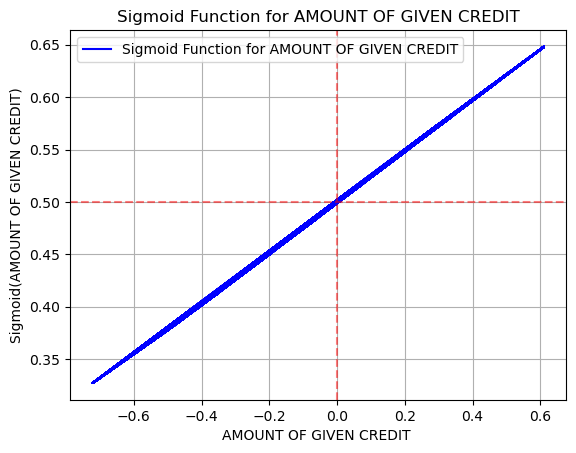

In [81]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
AMOUNT_OF_GIVEN_CREDIT_SF = X_train['AMOUNT_OF_GIVEN_CREDIT']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(AMOUNT_OF_GIVEN_CREDIT_SF)

# Plot the sigmoid function
plt.plot(AMOUNT_OF_GIVEN_CREDIT_SF, y_sigmoid, label='Sigmoid Function for AMOUNT OF GIVEN CREDIT', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('AMOUNT OF GIVEN CREDIT ')
plt.ylabel('Sigmoid(AMOUNT OF GIVEN CREDIT)')
plt.title('Sigmoid Function for AMOUNT OF GIVEN CREDIT')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

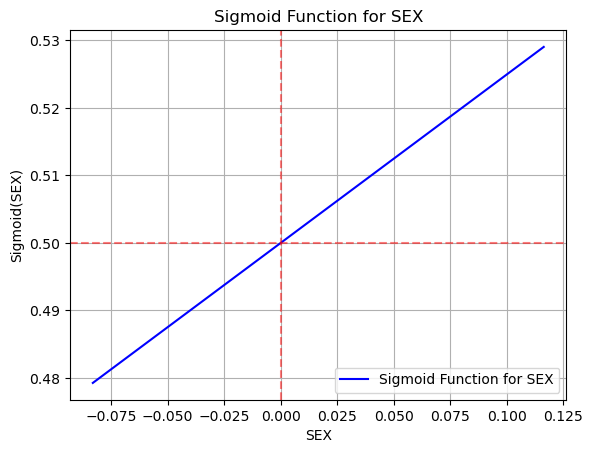

In [82]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
SEX_SF = X_train['SEX']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(SEX_SF)

# Plot the sigmoid function
plt.plot(SEX_SF, y_sigmoid, label='Sigmoid Function for SEX', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('SEX')
plt.ylabel('Sigmoid(SEX)')
plt.title('Sigmoid Function for SEX')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

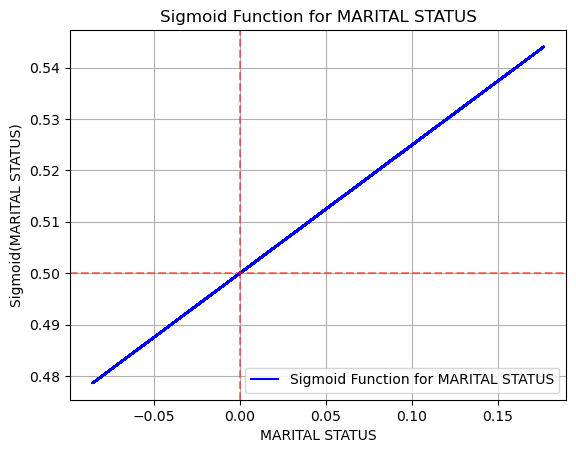

In [83]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
MARITAL_STATUS_SF = X_train['MARITAL_STATUS']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(MARITAL_STATUS_SF)

# Plot the sigmoid function
plt.plot(MARITAL_STATUS_SF, y_sigmoid, label='Sigmoid Function for MARITAL STATUS', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('MARITAL STATUS')
plt.ylabel('Sigmoid(MARITAL STATUS)')
plt.title('Sigmoid Function for MARITAL STATUS')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

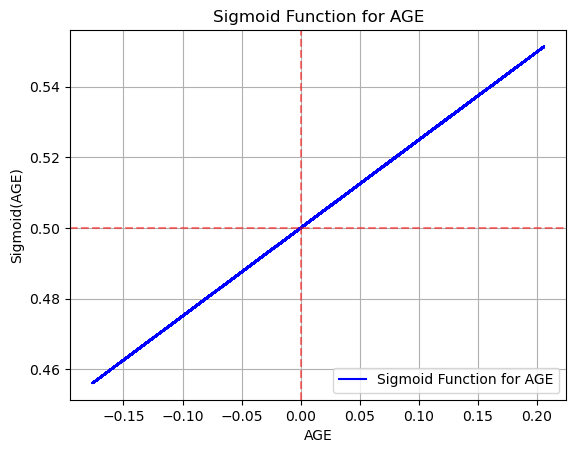

In [84]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
AGE_SF = X_train['AGE']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(AGE_SF)

# Plot the sigmoid function
plt.plot(AGE_SF, y_sigmoid, label='Sigmoid Function for AGE', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('AGE')
plt.ylabel('Sigmoid(AGE)')
plt.title('Sigmoid Function for AGE')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

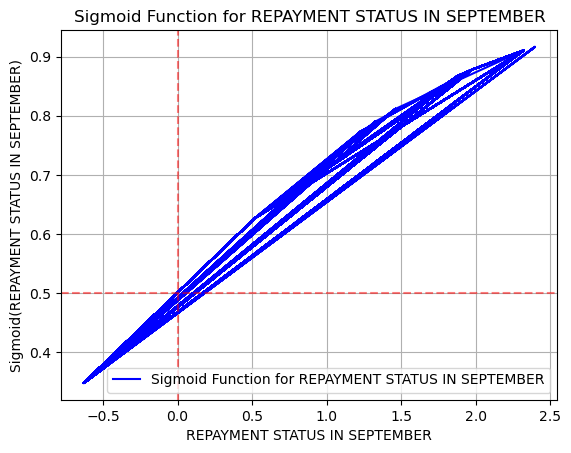

In [85]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
REPAYMENT_STATUS_IN_SEPTEMBER_SF = X_train['REPAYMENT_STATUS_IN_SEPTEMBER']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(REPAYMENT_STATUS_IN_SEPTEMBER_SF)

# Plot the sigmoid function
plt.plot(REPAYMENT_STATUS_IN_SEPTEMBER_SF, y_sigmoid, label='Sigmoid Function for REPAYMENT STATUS IN SEPTEMBER', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('REPAYMENT STATUS IN SEPTEMBER')
plt.ylabel('Sigmoid(REPAYMENT STATUS IN SEPTEMBER)')
plt.title('Sigmoid Function for REPAYMENT STATUS IN SEPTEMBER')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

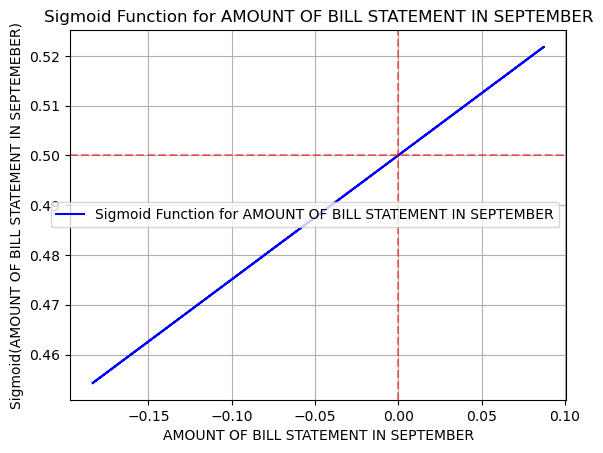

In [86]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER_SF = X_train['AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER_SF)

# Plot the sigmoid function
plt.plot(AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER_SF, y_sigmoid, label='Sigmoid Function for AMOUNT OF BILL STATEMENT IN SEPTEMBER', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('AMOUNT OF BILL STATEMENT IN SEPTEMBER')
plt.ylabel('Sigmoid(AMOUNT OF BILL STATEMENT IN SEPTEMEBER)')
plt.title('Sigmoid Function for AMOUNT OF BILL STATEMENT IN SEPTEMBER')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

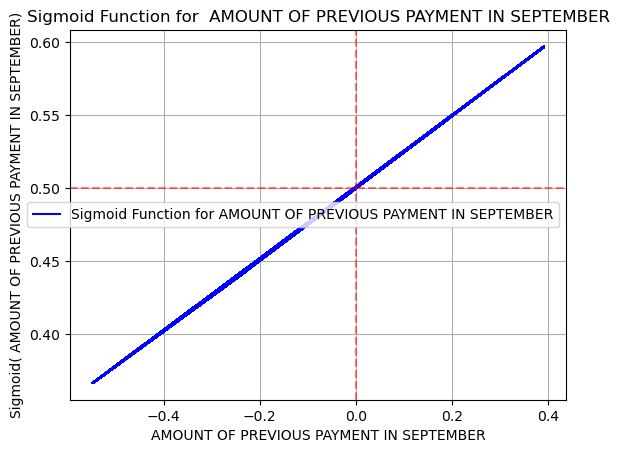

In [87]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis (input values)
# SF = sigmoid function
AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER_SF = X_train['AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']

# Compute the corresponding sigmoid values for each input
y_sigmoid = sigmoid(AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER_SF)

# Plot the sigmoid function
plt.plot(AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER_SF, y_sigmoid, label='Sigmoid Function for AMOUNT OF PREVIOUS PAYMENT IN SEPTEMBER', color='b')
plt.axhline(0.5, color='r', linestyle='dashed', alpha=0.5)
plt.axvline(0, color='r', linestyle='dashed', alpha=0.5)

# Add labels and title
plt.xlabel('AMOUNT OF PREVIOUS PAYMENT IN SEPTEMBER')
plt.ylabel('Sigmoid( AMOUNT OF PREVIOUS PAYMENT IN SEPTEMBER)')
plt.title('Sigmoid Function for  AMOUNT OF PREVIOUS PAYMENT IN SEPTEMBER')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [88]:
# confusion matrix for Logistic Regression test data

TestConfusionMatrix_LR = confusion_matrix(y_test,y_pred_test_LR)
TestConfusionMatrix_LR

array([[5296,  267],
       [1180,  589]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


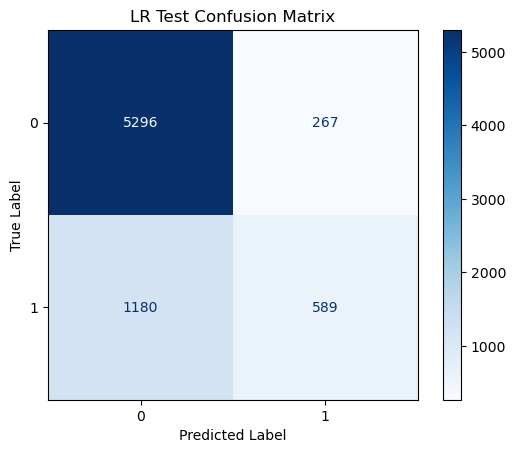

In [89]:
# plot the confusion matrix Logistic Regression for test data 

color = 'black'
matrix = plot_confusion_matrix(LR_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('LR Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [90]:
# Run the classification report for Logistic Regression test data

print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5563
           1       0.69      0.33      0.45      1769

    accuracy                           0.80      7332
   macro avg       0.75      0.64      0.66      7332
weighted avg       0.79      0.80      0.78      7332



In [91]:
acc_Test_LR = accuracy_score(y_test, y_pred_test_LR)
prec_Test_LR = precision_score(y_test, y_pred_test_LR)
rec_Test_LR = recall_score(y_test, y_pred_test_LR)
f1_Test_LR = f1_score(y_test, y_pred_test_LR)

resultsTest = pd.DataFrame([['Test Logistic Regression', acc_Test_LR, prec_Test_LR, rec_Test_LR, f1_Test_LR]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

resultsTest

,Model,Accuracy,Precision,Recall,F1 Score
0,Test Logistic Regression,0.802646,0.688084,0.332956,0.448762


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


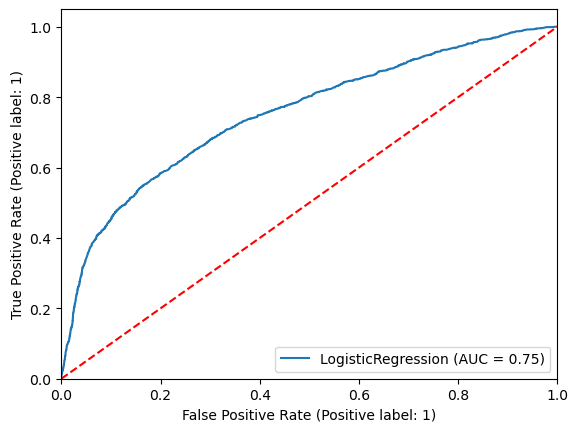

In [92]:
# ROC curve for Logistic Regression test data

metrics.plot_roc_curve(LR_model, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [93]:
resultsAUCTest = pd.DataFrame([['Test Logistic Regression', 0.75]],
               columns = ['Model', 'AUC value'])

resultsAUCTest

,Model,AUC value
0,Test Logistic Regression,0.75


### 6.2 KNN

D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

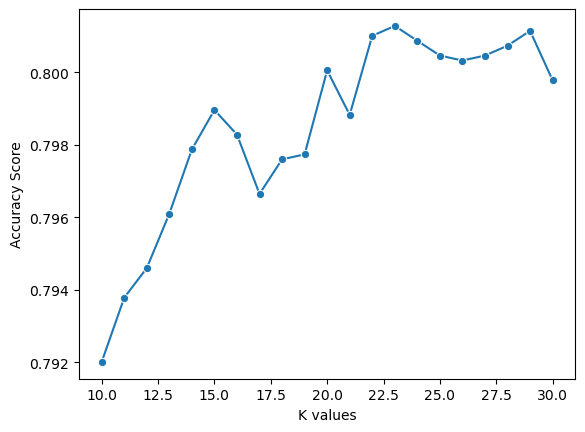

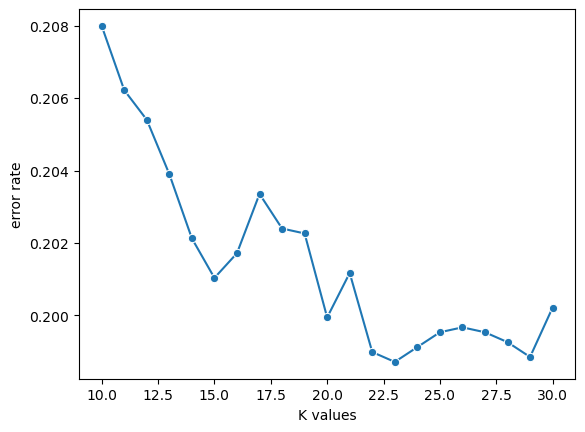

In [94]:
# kNN modelling to find best K value
k_values = [i for i in range (10,31)]
scores = []
error_rate = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred_knn!=y_test))
    
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.show()

sns.lineplot(x=k_values, y=error_rate, marker='o')
plt.xlabel('K values')
plt.ylabel('error rate')
plt.show()

In [95]:
# kNN modelling with best K value
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print('\nBest K Value = ',best_k)
print('\nEvaluation: \n')
print(classification_report(y_test, y_pred_knn))

print('\nkNN confusion matrix: \n')
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)


# Predict probabilities for the test data
y_prob = knn_model.predict_proba(X_test)

# Calculate cross-entropy loss
EPSILON = 1e-7
test_loss = -np.mean(y_test * np.log(y_prob[:, 1] + EPSILON) + (1 - y_test) * np.log(1 - y_prob[:, 1] + EPSILON))

print('\n')
print("Test loss: ", test_loss)


D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



Best K Value =  23

Evaluation: 

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      5563
           1       0.67      0.35      0.46      1769

    accuracy                           0.80      7332
   macro avg       0.74      0.65      0.67      7332
weighted avg       0.78      0.80      0.78      7332


kNN confusion matrix: 

[[5256  307]
 [1150  619]]


Test loss:  0.5069709687532606


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


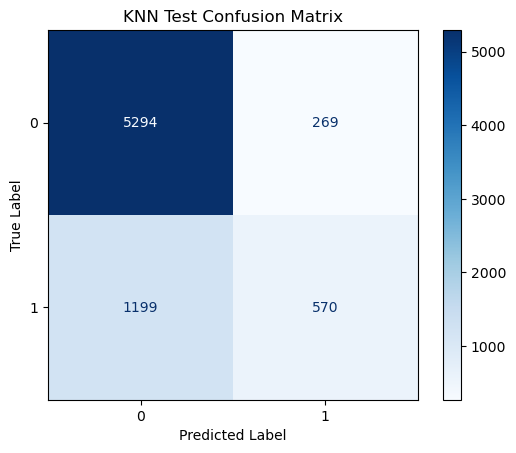

In [96]:
# plot the confusion matrix KNN5 for test data 

color = 'black'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('KNN Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [97]:
# Run the classification report for Logistic Regression test data

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      5563
           1       0.67      0.35      0.46      1769

    accuracy                           0.80      7332
   macro avg       0.74      0.65      0.67      7332
weighted avg       0.78      0.80      0.78      7332



In [98]:
acc_Test_KNN = accuracy_score(y_test, y_pred_knn)
prec_Test_KNN = precision_score(y_test, y_pred_knn)
rec_Test_KNN = recall_score(y_test, y_pred_knn)
f1_Test_KNN = f1_score(y_test, y_pred_knn)

resultsTestKNN = pd.DataFrame([['Test KNN', acc_Test_KNN, prec_Test_KNN, rec_Test_KNN, f1_Test_KNN]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

resultsTest = resultsTest.append(resultsTestKNN, ignore_index = True)
resultsTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\2700074475.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsTest = resultsTest.append(resultsTestKNN, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Test Logistic Regression,0.802646,0.688084,0.332956,0.448762
1,Test KNN,0.801282,0.668467,0.349915,0.459369


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


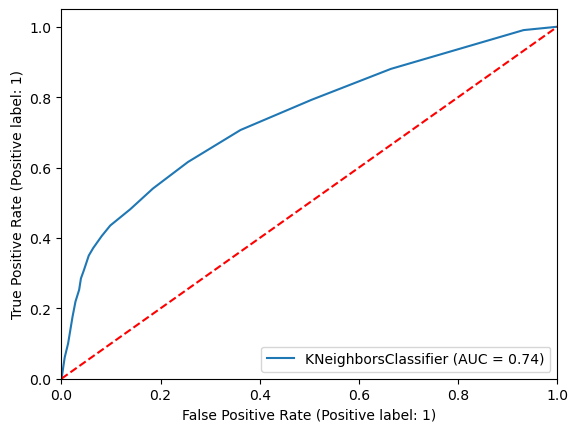

In [99]:
# ROC curve for Logistic Regression test data

metrics.plot_roc_curve(knn_model, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [100]:
resultsAUC_Test_KNN = pd.DataFrame([['Test KNN', 0.74]],
               columns = ['Model', 'AUC value'])

resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_KNN, ignore_index = True)
resultsAUCTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\2288495704.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_KNN, ignore_index = True)


,Model,AUC value
0,Test Logistic Regression,0.75
1,Test KNN,0.74


### 6.3 Gaussian Naive Bayes

In [101]:
GNB_model = GaussianNB()
GNB_model = GNB_model.fit(X_train, y_train)

y_pred_test_GNB = GNB_model.predict(X_test)

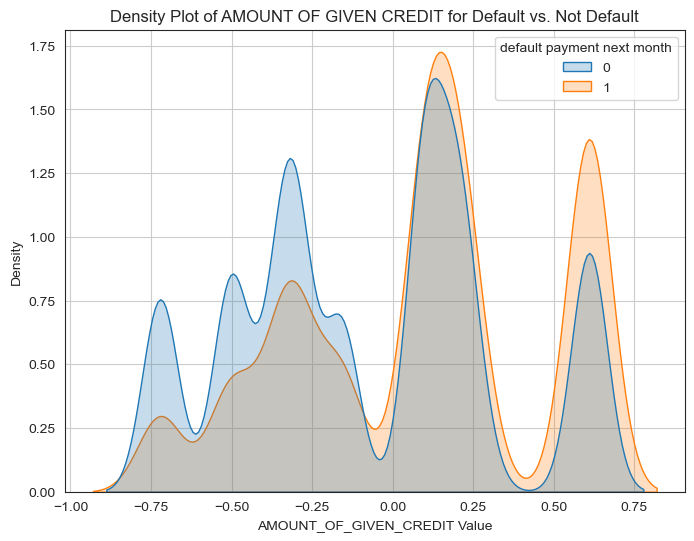

In [102]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='AMOUNT_OF_GIVEN_CREDIT', hue='default payment next month', fill=True, common_norm=False)

# Annotate specific points with labels
#plt.text(6, 0.15, 'Default', fontsize=12, color='blue')
#plt.text(9, 0.15, 'Not Default', fontsize=12, color='orange')

plt.xlabel('AMOUNT_OF_GIVEN_CREDIT Value')
plt.ylabel('Density')
plt.title('Density Plot of AMOUNT OF GIVEN CREDIT for Default vs. Not Default')
plt.grid(True)
plt.show()

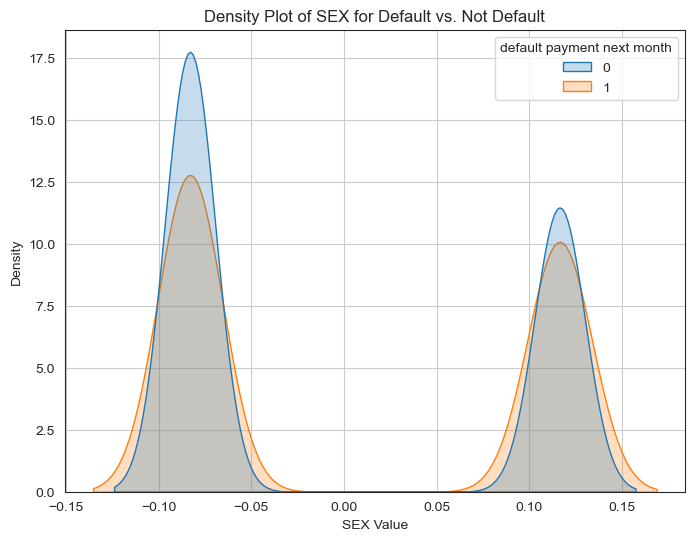

In [103]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='SEX', hue='default payment next month', fill=True, common_norm=False)

plt.xlabel('SEX Value')
plt.ylabel('Density')
plt.title('Density Plot of SEX for Default vs. Not Default')
plt.grid(True)
plt.show()

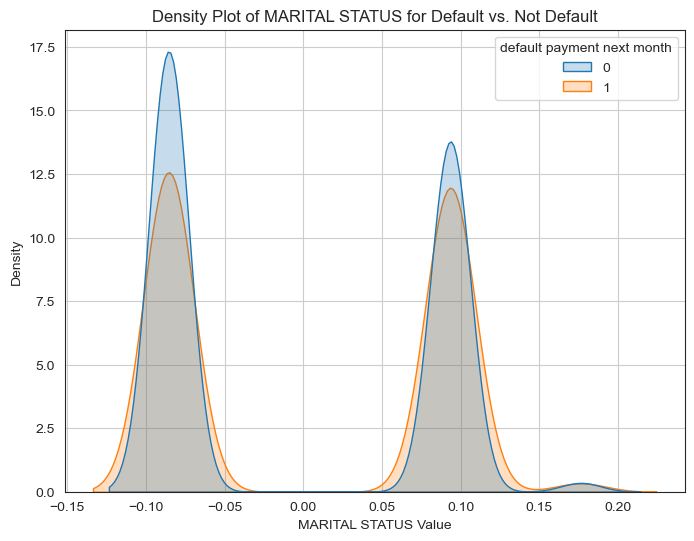

In [104]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='MARITAL_STATUS', hue='default payment next month', fill=True, common_norm=False)

plt.xlabel('MARITAL STATUS Value')
plt.ylabel('Density')
plt.title('Density Plot of MARITAL STATUS for Default vs. Not Default')
plt.grid(True)
plt.show()

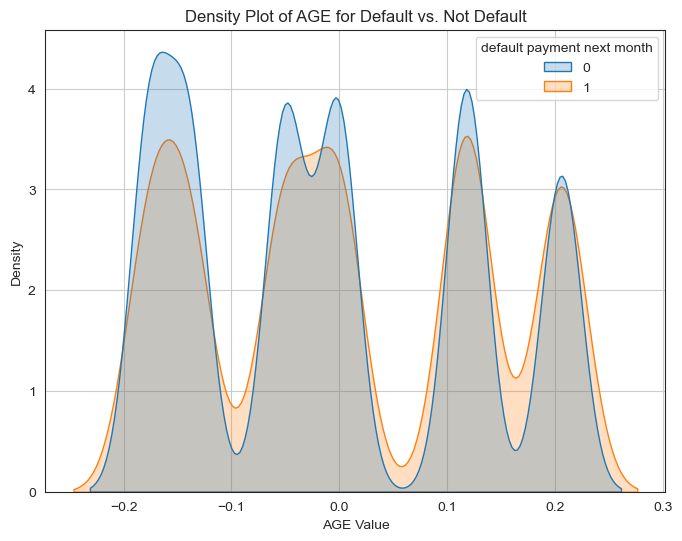

In [105]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='AGE', hue='default payment next month', fill=True, common_norm=False)

plt.xlabel('AGE Value')
plt.ylabel('Density')
plt.title('Density Plot of AGE for Default vs. Not Default')
plt.grid(True)
plt.show()

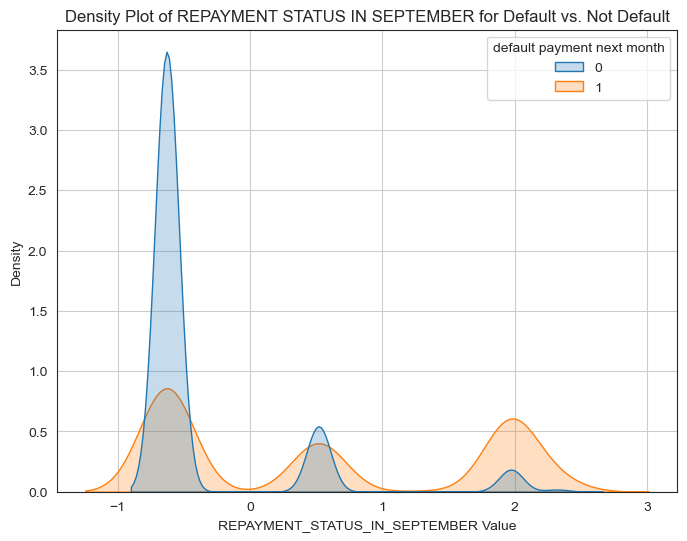

In [106]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='REPAYMENT_STATUS_IN_SEPTEMBER', hue='default payment next month', fill=True, common_norm=False)

plt.xlabel('REPAYMENT_STATUS_IN_SEPTEMBER Value')
plt.ylabel('Density')
plt.title('Density Plot of REPAYMENT STATUS IN SEPTEMBER for Default vs. Not Default')
plt.grid(True)
plt.show()

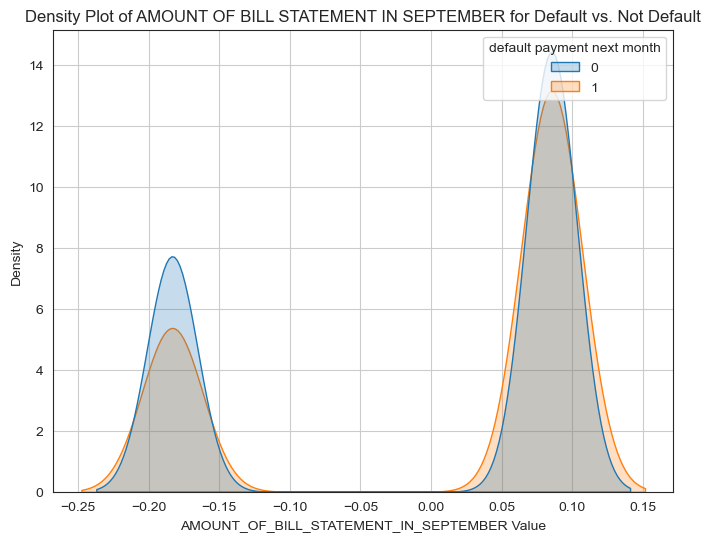

In [107]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER', hue='default payment next month', fill=True, common_norm=False)

plt.xlabel('AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER Value')
plt.ylabel('Density')
plt.title('Density Plot of AMOUNT OF BILL STATEMENT IN SEPTEMBER for Default vs. Not Default')
plt.grid(True)
plt.show()

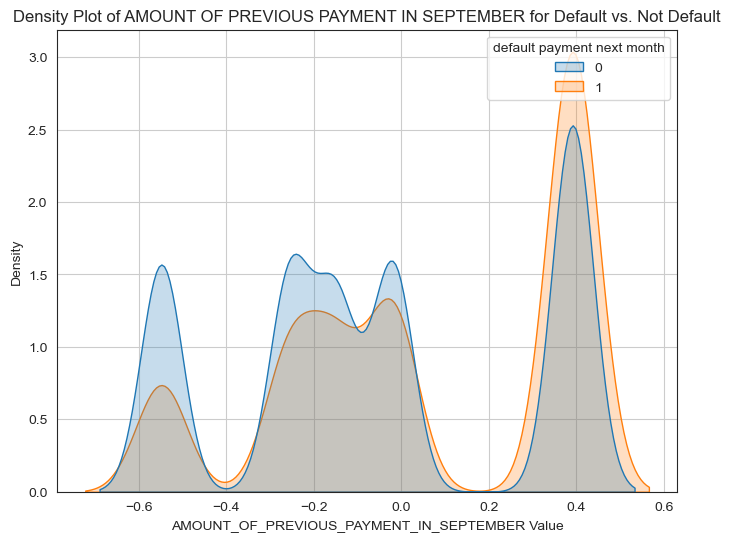

In [108]:
data = file_Ready_Model
# Create a density plot for each class
plt.figure(figsize=(8, 6))
sns.set_style("white")
sns.kdeplot(data=data, x='AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER', hue='default payment next month', fill=True, common_norm=False)

plt.xlabel('AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER Value')
plt.ylabel('Density')
plt.title('Density Plot of AMOUNT OF PREVIOUS PAYMENT IN SEPTEMBER for Default vs. Not Default')
plt.grid(True)
plt.show()

In [109]:
# confusion matrix for Gaussian Naive Bayes test data

TestConfusionMatrix_GNB = confusion_matrix(y_test,y_pred_test_GNB)
TestConfusionMatrix_GNB

array([[5198,  365],
       [1077,  692]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


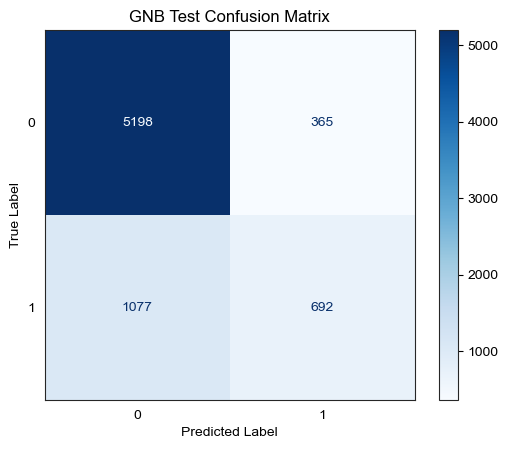

In [110]:
# plot the confusion matrix Gaussian Naive Bayes for test data 

color = 'black'
matrix = plot_confusion_matrix(GNB_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('GNB Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [111]:
# Run the classification report for Gaussian Naive Bayes test data

print(classification_report(y_test, y_pred_test_GNB))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5563
           1       0.65      0.39      0.49      1769

    accuracy                           0.80      7332
   macro avg       0.74      0.66      0.68      7332
weighted avg       0.79      0.80      0.78      7332



In [112]:
acc_Test_GNB = accuracy_score(y_test, y_pred_test_GNB)
prec_Test_GNB = precision_score(y_test, y_pred_test_GNB)
rec_Test_GNB = recall_score(y_test, y_pred_test_GNB)
f1_Test_GNB = f1_score(y_test, y_pred_test_GNB)

resultsTestGNB = pd.DataFrame([['Test GNB', acc_Test_GNB, prec_Test_GNB, rec_Test_GNB, f1_Test_GNB]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

resultsTest = resultsTest.append(resultsTestGNB, ignore_index = True)
resultsTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\143457950.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsTest = resultsTest.append(resultsTestGNB, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Test Logistic Regression,0.802646,0.688084,0.332956,0.448762
1,Test KNN,0.801282,0.668467,0.349915,0.459369
2,Test GNB,0.803328,0.654683,0.391181,0.489738


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


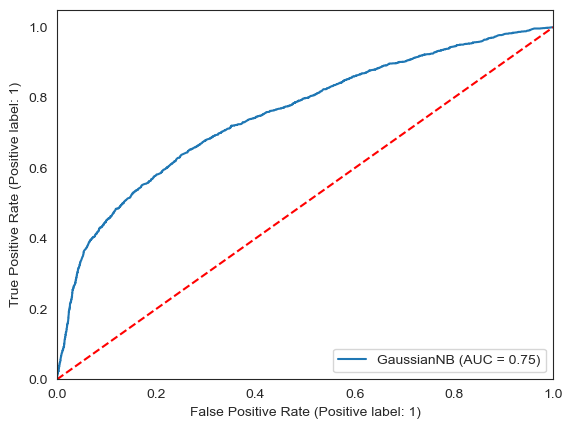

In [113]:
# ROC curve for Gaussian Naive Bayes test data

metrics.plot_roc_curve(GNB_model, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [114]:
resultsAUC_Test_GNB = pd.DataFrame([['Test GNB', 0.75]],
               columns = ['Model', 'AUC value'])

resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_GNB, ignore_index = True)
resultsAUCTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\2949880723.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_GNB, ignore_index = True)


,Model,AUC value
0,Test Logistic Regression,0.75
1,Test KNN,0.74
2,Test GNB,0.75


### 6.4 Decision Tree

-------------

[[5292  271]
 [1179  590]]

Decision Tree Evaluation:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      5563
           1       0.69      0.33      0.45      1769

    accuracy                           0.80      7332
   macro avg       0.75      0.64      0.66      7332
weighted avg       0.79      0.80      0.78      7332


Test Loss:  0.46385339542294146


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


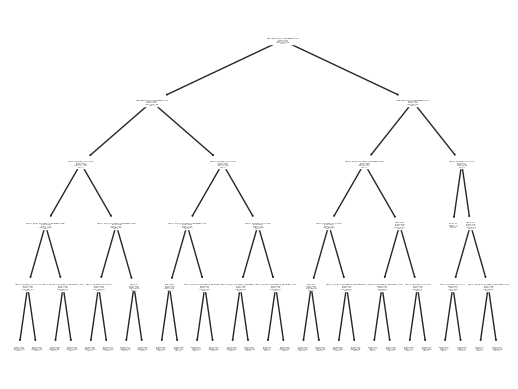

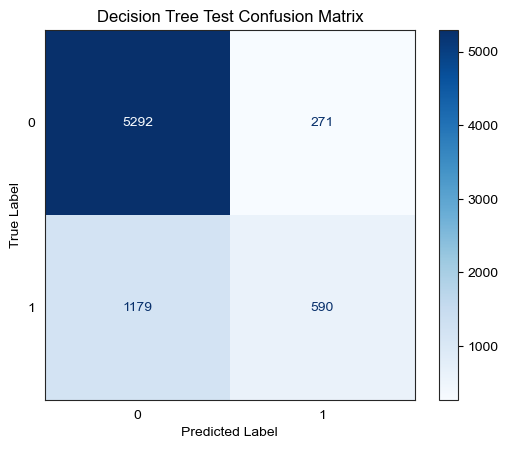

In [115]:
# DECISION TREE
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)

DT_model = DT_model.fit(X_train, y_train_encoded)

# visualise decision tree
features = ['AMOUNT_OF_GIVEN_CREDIT', 'SEX', 'MARITAL_STATUS', 'AGE', 'REPAYMENT_STATUS_IN_SEPTEMBER', 'AMOUNT_OF_BILL_STATEMENT_IN_SEPTEMBER', 'AMOUNT_OF_PREVIOUS_PAYMENT_IN_SEPTEMBER']
classes=['1','0']

tree.plot_tree(DT_model, feature_names=features, class_names=classes)

y_pred_DT = DT_model.predict(X_test)
y_prob = DT_model.predict_proba(X_test)

cm = confusion_matrix(y_test_encoded, y_pred_DT)
print("-------------\n")
print(cm)

print('\nDecision Tree Evaluation:\n')
print(classification_report(y_test_encoded,y_pred_DT, zero_division=1))
EPSILON = 1e-7
test_loss = -np.mean(y_test * np.log(y_prob[:, 1] + EPSILON) + (1 - y_test) * np.log(1 - y_prob[:, 1] + EPSILON))
print('\nTest Loss: ',test_loss)

cm_df = pd.DataFrame(cm, index = ['1','0'], columns = ['1','0'])

# plot the confusion matrix DT for test data 
color = 'black'
matrix = plot_confusion_matrix(DT_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Decision Tree Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [116]:
acc_Test_DT = accuracy_score(y_test, y_pred_DT)
prec_Test_DT = precision_score(y_test, y_pred_DT)
rec_Test_DT = recall_score(y_test, y_pred_DT)
f1_Test_DT = f1_score(y_test, y_pred_DT)

resultsTestDT = pd.DataFrame([['Test DT', acc_Test_DT, prec_Test_DT, rec_Test_DT, f1_Test_DT]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

resultsTest = resultsTest.append(resultsTestDT, ignore_index = True)
resultsTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\3975606975.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsTest = resultsTest.append(resultsTestDT, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Test Logistic Regression,0.802646,0.688084,0.332956,0.448762
1,Test KNN,0.801282,0.668467,0.349915,0.459369
2,Test GNB,0.803328,0.654683,0.391181,0.489738
3,Test DT,0.802237,0.685250,0.333522,0.448669


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


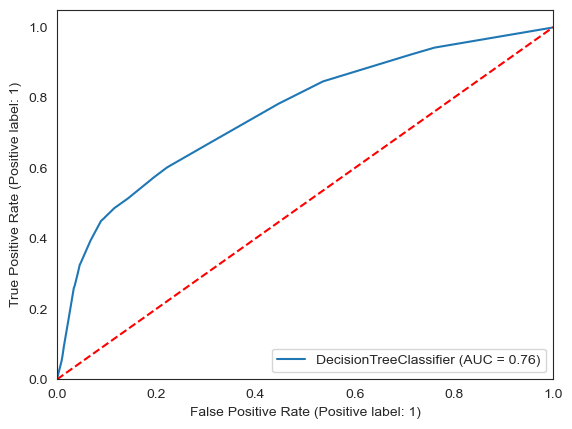

In [117]:
# ROC curve for Decision Tree test data

metrics.plot_roc_curve(DT_model, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [118]:
resultsAUC_Test_DT = pd.DataFrame([['Test DT', 0.76]],
               columns = ['Model', 'AUC value'])

resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_DT, ignore_index = True)
resultsAUCTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\3546402376.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_DT, ignore_index = True)


,Model,AUC value
0,Test Logistic Regression,0.75
1,Test KNN,0.74
2,Test GNB,0.75
3,Test DT,0.76


### 6.5 XGboost Classifier

In [119]:
# fit model on training data
XG_model = XGBClassifier(random_state=42)
XG_model = XG_model.fit(X_train, y_train)

y_pred_train_XG = XG_model.predict(X_train)
y_pred_test_XG = XG_model.predict(X_test)

In [129]:
# fit data into Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor
GB_model = GradientBoostingRegressor(random_state=42)
GB_model = XG_model.fit(X_train, y_train)

y_pred_train_GB = GB_model.predict(X_train)
y_pred_test_GB = GB_model.predict(X_test)

In [130]:
# compare MSE with Gradient Boosting 
from sklearn.metrics import mean_squared_error
mse_GB = mean_squared_error(y_test, y_pred_test_GB)
print(f"Mean Squared Error for Gradient Boosting: {mse_GB}")
mse_XG = mean_squared_error(y_test, y_pred_test_XG)
print(f"Mean Squared Error for Extreme Gradient Boosting: {mse_XG}")

Mean Squared Error for Gradient Boosting: 0.20444626295690124
Mean Squared Error for Extreme Gradient Boosting: 0.20444626295690124


In [120]:
# confusion matrix for KNN5 test data

TestConfusionMatrix_XG = confusion_matrix(y_test,y_pred_test_XG)
TestConfusionMatrix_XG

array([[5261,  302],
       [1197,  572]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


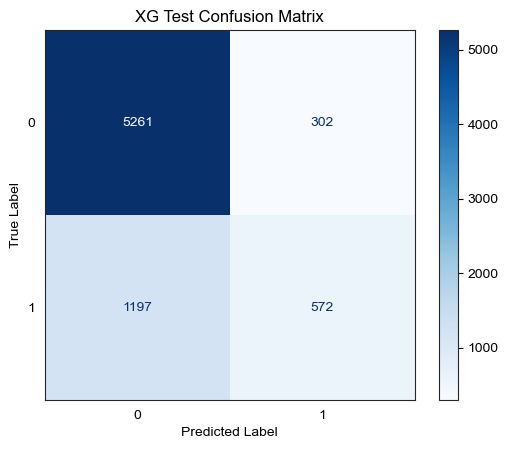

In [121]:
# plot the confusion matrix KNN5 for test data 

color = 'black'
matrix = plot_confusion_matrix(XG_model, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('XG Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [122]:
# Run the classification report for XGboost Classifier test data

print(classification_report(y_test, y_pred_test_XG))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      5563
           1       0.65      0.32      0.43      1769

    accuracy                           0.80      7332
   macro avg       0.73      0.63      0.65      7332
weighted avg       0.78      0.80      0.77      7332



In [123]:
acc_Test_XG = accuracy_score(y_test, y_pred_test_XG)
prec_Test_XG = precision_score(y_test, y_pred_test_XG)
rec_Test_XG = recall_score(y_test, y_pred_test_XG)
f1_Test_XG = f1_score(y_test, y_pred_test_XG)

resultsTestXG = pd.DataFrame([['Test XG', acc_Test_XG, prec_Test_XG, rec_Test_XG, f1_Test_XG]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

resultsTest = resultsTest.append(resultsTestXG, ignore_index = True)
resultsTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\688588202.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsTest = resultsTest.append(resultsTestXG, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Test Logistic Regression,0.802646,0.688084,0.332956,0.448762
1,Test KNN,0.801282,0.668467,0.349915,0.459369
2,Test GNB,0.803328,0.654683,0.391181,0.489738
3,Test DT,0.802237,0.685250,0.333522,0.448669
4,Test XG,0.795554,0.654462,0.323347,0.432841


D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


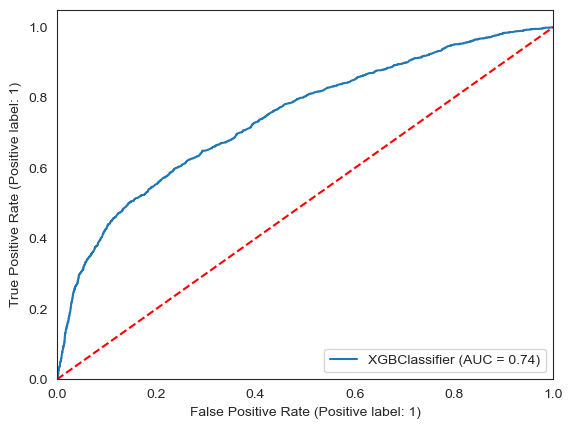

In [124]:
# ROC curve for XGboost Classifier test data

metrics.plot_roc_curve(XG_model, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

In [125]:
resultsAUC_Test_XG = pd.DataFrame([['Test XG', 0.74]],
               columns = ['Model', 'AUC value'])

resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_XG, ignore_index = True)
resultsAUCTest

C:\Users\hojk8\AppData\Local\Temp\ipykernel_21444\1328401578.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsAUCTest = resultsAUCTest.append(resultsAUC_Test_XG, ignore_index = True)


,Model,AUC value
0,Test Logistic Regression,0.75
1,Test KNN,0.74
2,Test GNB,0.75
3,Test DT,0.76
4,Test XG,0.74


# ---------------------------------------------------------------------------------------------------------------
# 7. Conclusion

### 7.1 Classification Report for all Algorithm

In [126]:
TestDataFrame = resultsTest
TestDataFrame

,Model,Accuracy,Precision,Recall,F1 Score
0,Test Logistic Regression,0.802646,0.688084,0.332956,0.448762
1,Test KNN,0.801282,0.668467,0.349915,0.459369
2,Test GNB,0.803328,0.654683,0.391181,0.489738
3,Test DT,0.802237,0.685250,0.333522,0.448669
4,Test XG,0.795554,0.654462,0.323347,0.432841


### 7.2 Classification Report for all Algorithm 

In [127]:
resultsAUCTest

,Model,AUC value
0,Test Logistic Regression,0.75
1,Test KNN,0.74
2,Test GNB,0.75
3,Test DT,0.76
4,Test XG,0.74
